In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CHF_USD_5min.csv')
df = pd.read_csv('CHF_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222384, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,0.96645,0.96645,0.96645,0.96645
2020-01-01 17:05:00,0.96626,0.96645,0.96597,0.96645
2020-01-01 17:10:00,0.96598,0.96831,0.96597,0.96831
2020-01-01 17:15:00,0.96820,0.96775,0.96771,0.96831
2020-01-01 17:20:00,0.96775,0.96595,0.96531,0.96827


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222383, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,0.96645,0.96645,0.96645,0.96645,0.96645,17,2,1,0.00000,0.96645,0.00000,0.966450
2020-01-01 17:05:00,0.96626,0.96645,0.96597,0.96645,0.96831,17,2,1,-0.00019,0.96621,0.00048,0.966283
2020-01-01 17:10:00,0.96598,0.96831,0.96597,0.96831,0.96775,17,2,1,-0.00233,0.96714,0.00234,0.967143
2020-01-01 17:15:00,0.96820,0.96775,0.96771,0.96831,0.96595,17,2,1,0.00045,0.96801,0.00060,0.967993
2020-01-01 17:20:00,0.96775,0.96595,0.96531,0.96827,0.96512,17,2,1,0.00180,0.96679,0.00296,0.966820


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,0.96645,0.96645,0.96645,0.96645,0.96645,17,2,1,0.00000,0.96645,0.00000,0.966450,-25.509745
2020-01-01 17:05:00,0.96626,0.96645,0.96597,0.96645,0.96831,17,2,1,-0.00019,0.96621,0.00048,0.966283,-25.510639
2020-01-01 17:10:00,0.96598,0.96831,0.96597,0.96831,0.96775,17,2,1,-0.00233,0.96714,0.00234,0.967143,-25.510630
2020-01-01 17:15:00,0.96820,0.96775,0.96771,0.96831,0.96595,17,2,1,0.00045,0.96801,0.00060,0.967993,-25.510489
2020-01-01 17:20:00,0.96775,0.96595,0.96531,0.96827,0.96512,17,2,1,0.00180,0.96679,0.00296,0.966820,-25.510641


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  0.96645  0.96645  0.96645         0.96645    17    2   
2020-01-01 17:05:00  0.96626  0.96597  0.96645         0.96831    17    2   
2020-01-01 17:10:00  0.96598  0.96597  0.96831         0.96775    17    2   
2020-01-01 17:15:00  0.96820  0.96771  0.96831         0.96595    17    2   
2020-01-01 17:20:00  0.96775  0.96531  0.96827         0.96512    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00000    0.96645  0.00000    0.966450 -25.509745  
2020-01-01 17:05:00     1  -0.00019    0.96621  0.00048    0.966283 -25.510639  
2020-01-01 17:10:00     1  -0.00233    0.96714  0.00234    0.967143 -25.510630  
2020-01-01 17:15:00     1   0.00045    0.96801  0.00060

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_5Min(X,y)

177906
177906
22000
22000
22477
22477


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(177906, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(177881, 24, 12)
(21975, 24, 12)
(22452, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(177881, 1)
(21975, 1)
(22452, 1)


array([[0.70555353],
       [0.7070856 ],
       [0.7070856 ],
       ...,
       [0.7574873 ],
       [0.75878954],
       [0.7600918 ]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.70555353, 0.7070856 , 0.7070856 , ..., 0.7574873 , 0.75878954,
       0.7600918 ], dtype=float32)

In [ ]:
TargetIndex = df.columns.tolist().index('close')
HighIndex = df.columns.tolist().index('high')
LowIndex = df.columns.tolist().index('low')

In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 256)           207360    
                                                                 
 gru_1 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 16)                3936      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_5min_GRU.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
462/463 [============================>.] - ETA: 0s - loss: 454.6706 - mae: 7.4646 - mse: 454.6706 - root_mean_squared_error: 21.3230 - mape: 24297.5703
Epoch 1: val_mse improved from inf to 1.80665, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU.hdf5
463/463 [==============================] - 145s 304ms/step - loss: 454.6426 - mae: 7.4642 - mse: 454.6426 - root_mean_squared_error: 21.3224 - mape: 24296.1094 - val_loss: 1.8067 - val_mae: 1.3320 - val_mse: 1.8067 - val_root_mean_squared_error: 1.3441 - val_mape: 80291.2031
Epoch 2/60
462/463 [============================>.] - ETA: 0s - loss: 0.9903 - mae: 0.9487 - mse: 0.9903 - root_mean_squared_error: 0.9952 - mape: 7687.1768
Epoch 2: val_mse improved from 1.80665 to 0.36825, saving model to /content/drive/MyDrive/modelweights/CHF_USD_5min_GRU.hdf5
463/463 [==============================] - 141s 305ms/step - loss: 0.9903 - mae: 0.9487 - mse: 0.9903 - root_mean_squared_error: 0.9951 - mape: 7686.7173 - va

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
460/463 [============================>.] - ETA: 0s - loss: 322.5918 - mae: 2.3269 - mse: 322.5918 - root_mean_squared_error: 17.9608 - mape: 2145.7156
Epoch 1: val_mse improved from inf to 0.05702, saving model to weights.best.hdf5
463/463 [==============================] - 23s 20ms/step - loss: 321.1756 - mae: 2.3174 - mse: 321.1756 - root_mean_squared_error: 17.9214 - mape: 2136.4949 - val_loss: 0.0570 - val_mae: 0.1844 - val_mse: 0.0570 - val_root_mean_squared_error: 0.2388 - val_mape: 12099.5244
Epoch 2/60
462/463 [============================>.] - ETA: 0s - loss: 0.0483 - mae: 0.1602 - mse: 0.0483 - root_mean_squared_error: 0.2199 - mape: 2121.9583
Epoch 2: val_mse improved from 0.05702 to 0.03563, saving model to weights.best.hdf5
463/463 [==============================] - 7s 16ms/step - loss: 0.0483 - mae: 0.1602 - mse: 0.0483 - root_mean_squared_error: 0.2199 - mape: 2121.8325 - val_loss: 0.0356 - val_mae: 0.1413 - val_mse: 0.0356 - val_root_mean_squared_error: 0.188

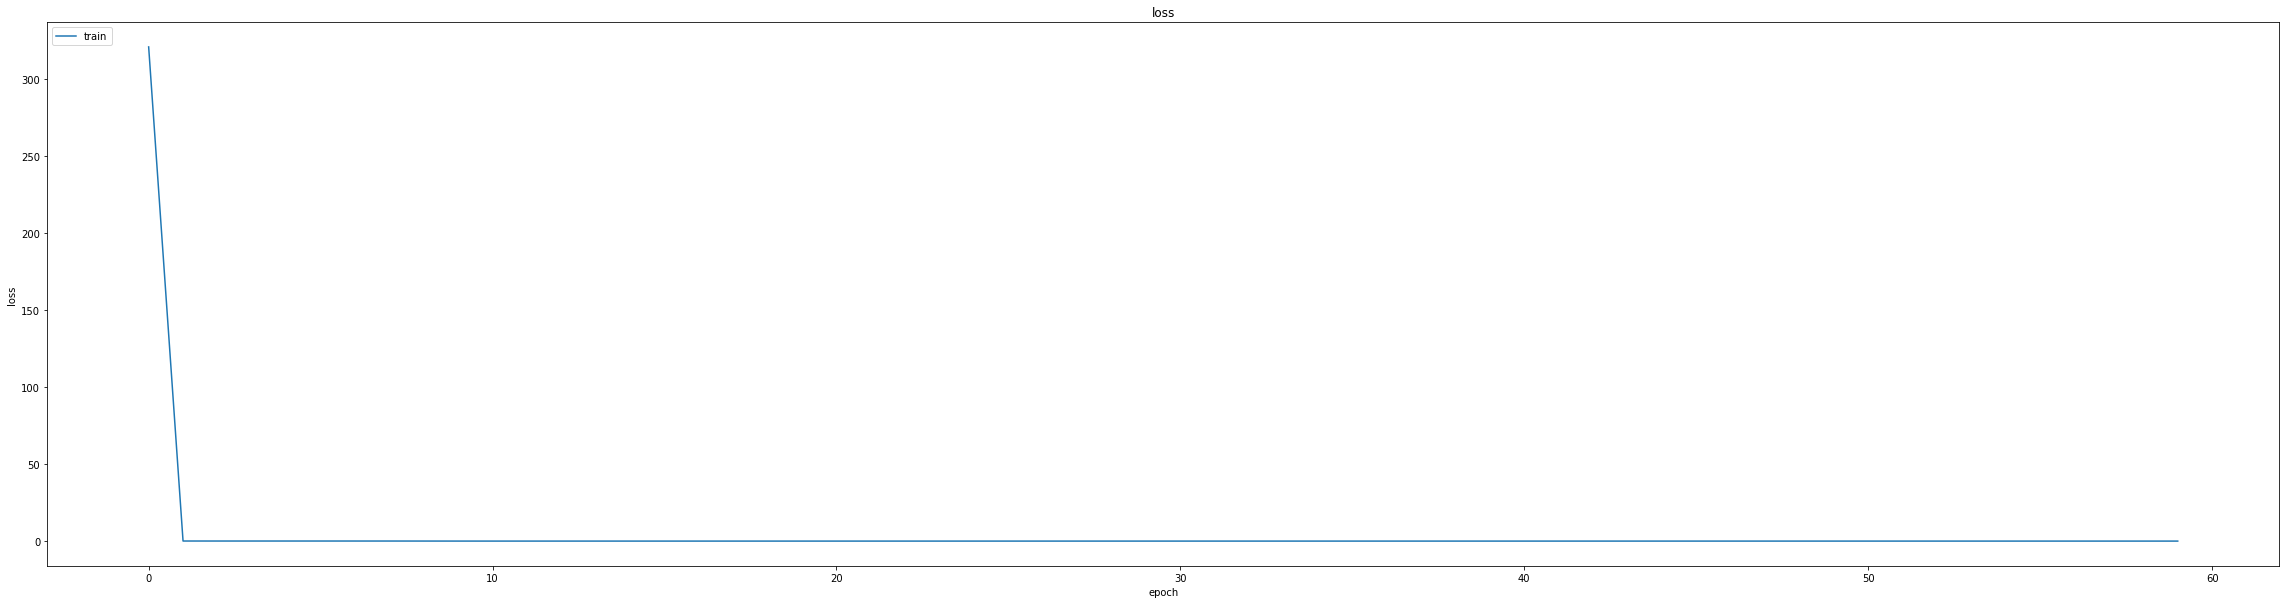

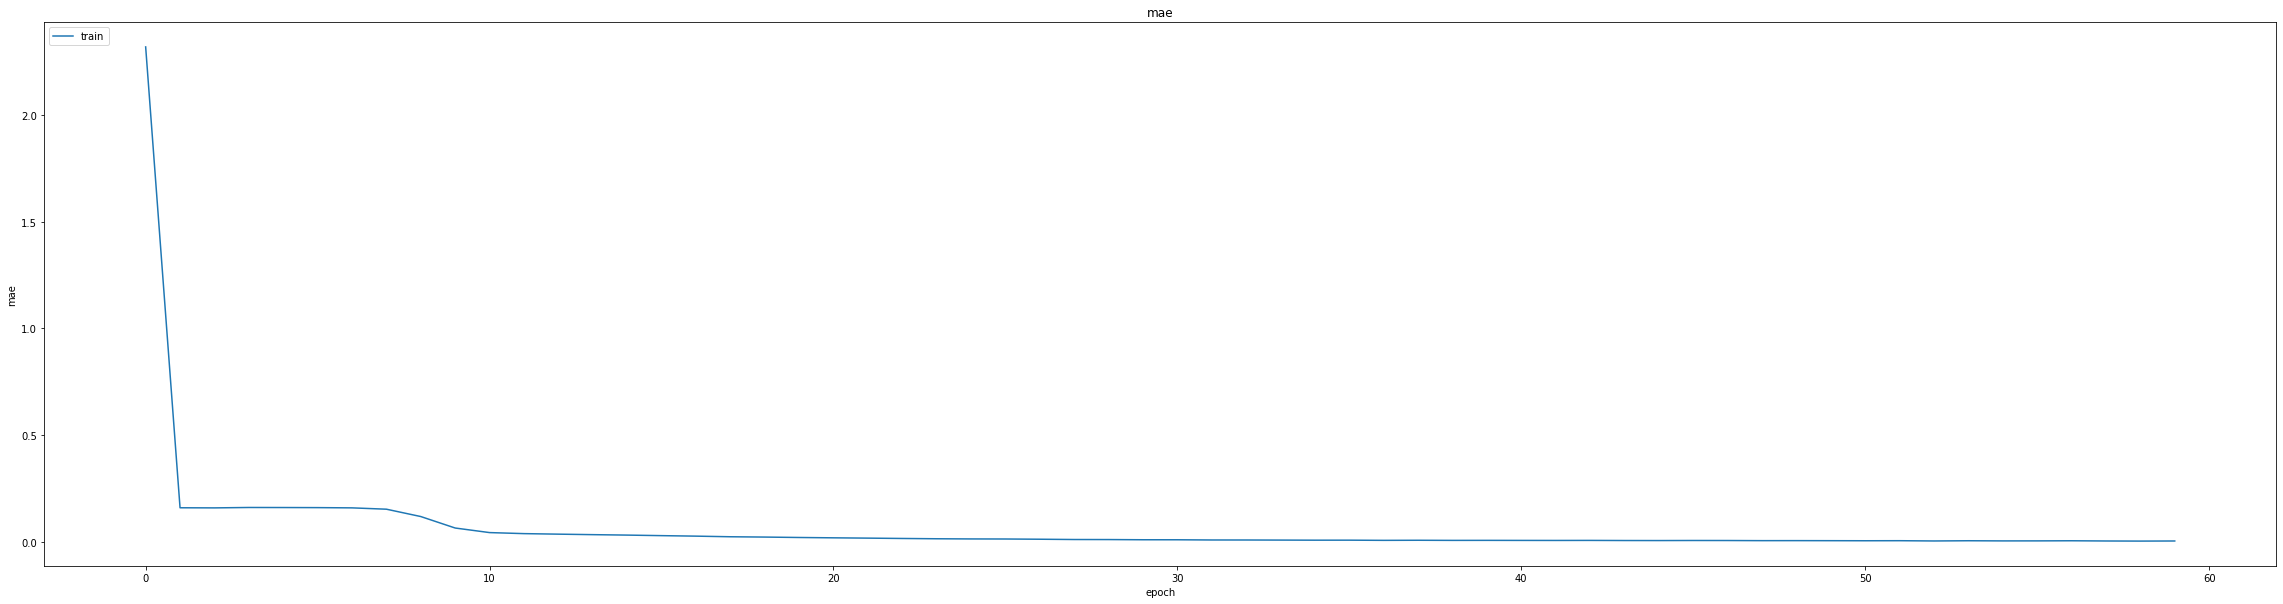

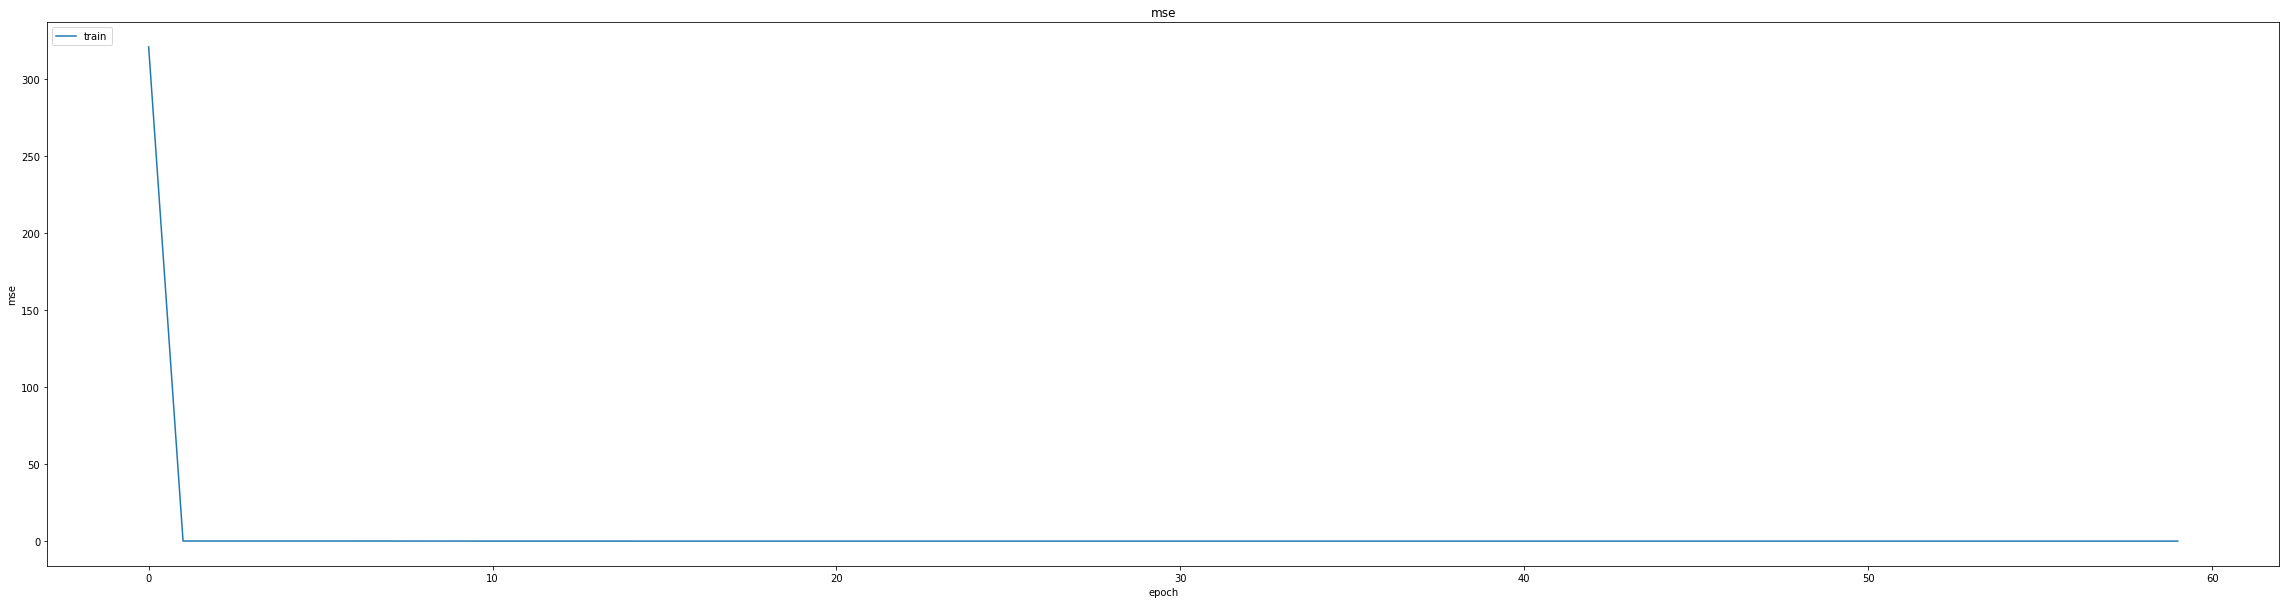

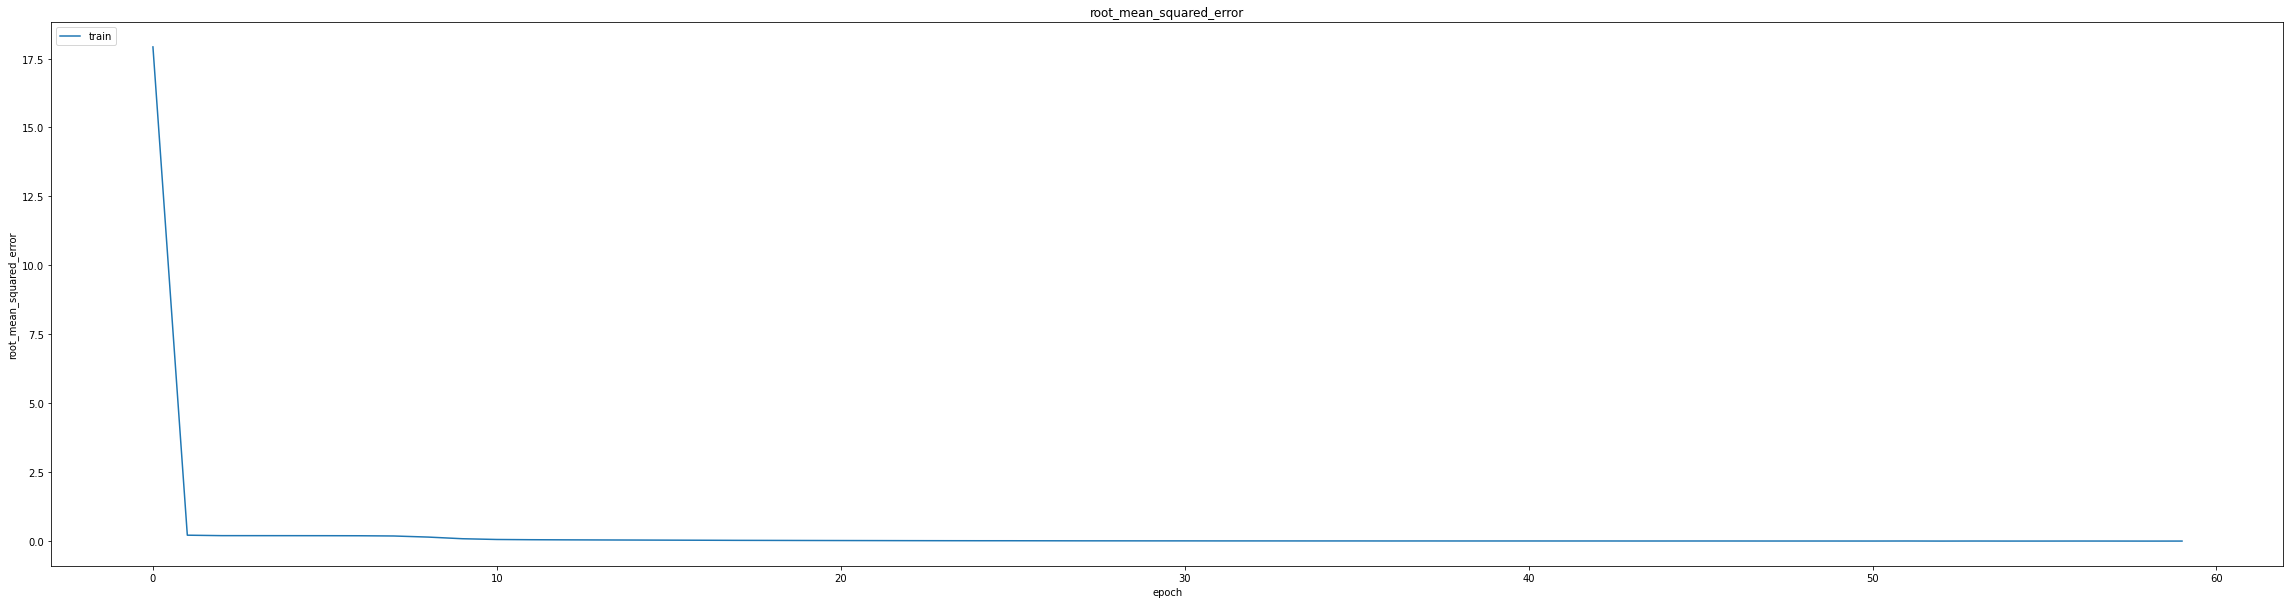

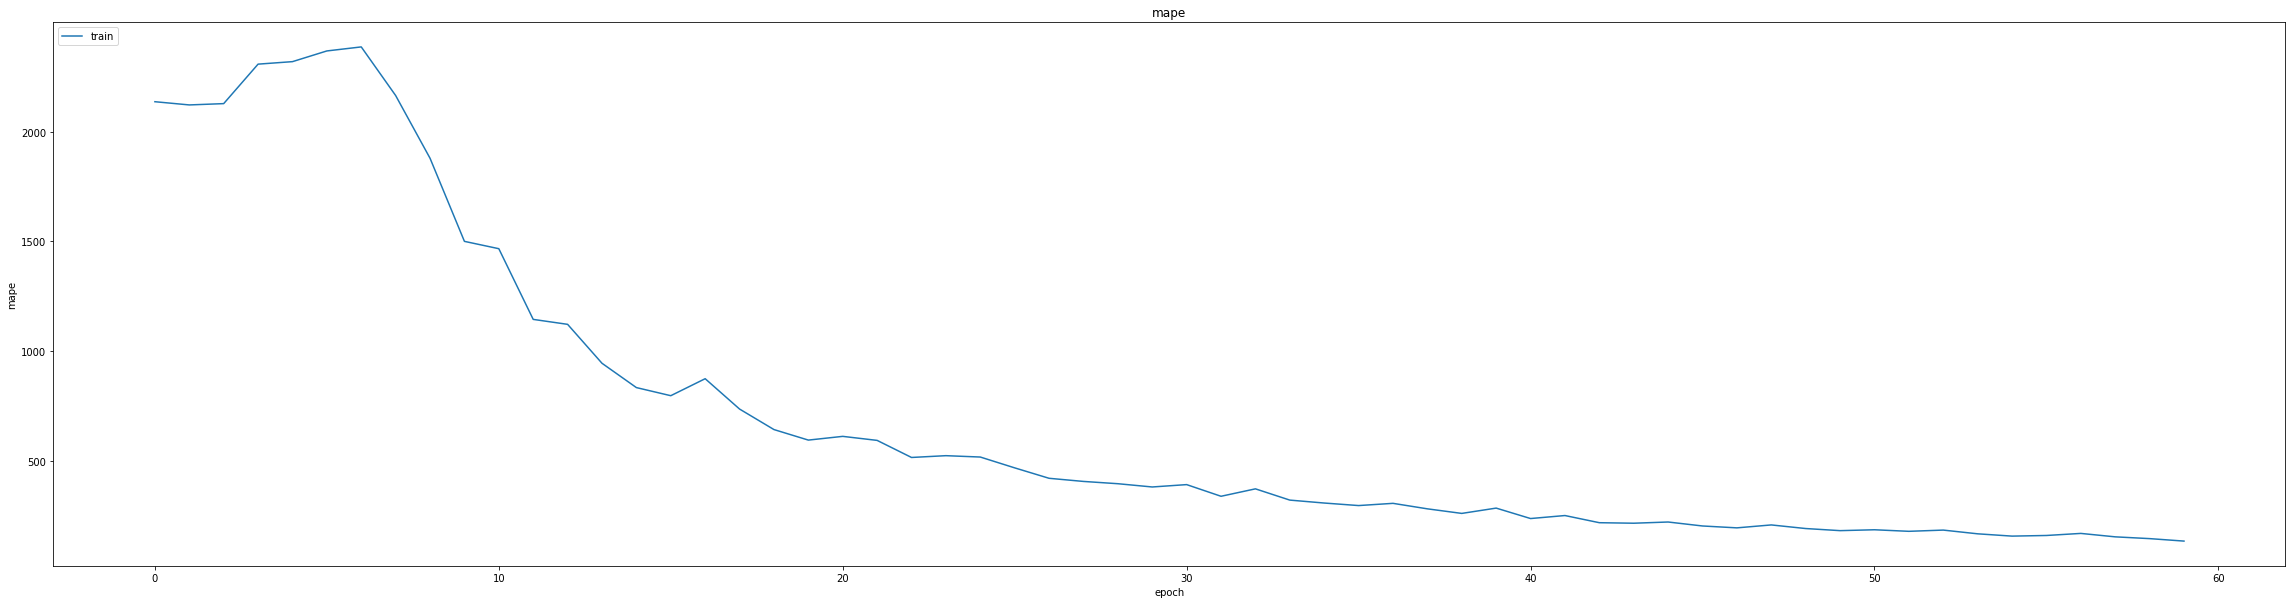

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008177137933671474
0.011735392734408379
687/687 [==============================] - 5s 5ms/step
0.984691008334663


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
460/463 [============================>.] - ETA: 0s - loss: 0.0076 - mae: 0.0378 - mse: 0.0076 - root_mean_squared_error: 0.0872 - mape: 452.5466
Epoch 1: val_mse did not improve from 0.00014
463/463 [==============================] - 16s 20ms/step - loss: 0.0076 - mae: 0.0377 - mse: 0.0076 - root_mean_squared_error: 0.0870 - mape: 450.5774 - val_loss: 2.3686e-04 - val_mae: 0.0112 - val_mse: 2.3686e-04 - val_root_mean_squared_error: 0.0154 - val_mape: 2824.6648 - lr: 0.0010
Epoch 2/20
460/463 [============================>.] - ETA: 0s - loss: 1.2291e-04 - mae: 0.0085 - mse: 1.2291e-04 - root_mean_squared_error: 0.0111 - mape: 255.2335
Epoch 2: val_mse did not improve from 0.00014
463/463 [==============================] - 7s 16ms/step - loss: 1.2278e-04 - mae: 0.0084 - mse: 1.2278e-04 - root_mean_squared_error: 0.0111 - mape: 254.1302 - val_loss: 2.0823e-04 - val_mae: 0.0096 - val_mse: 2.0823e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 2244.8579 - lr: 0.0010
lr chan

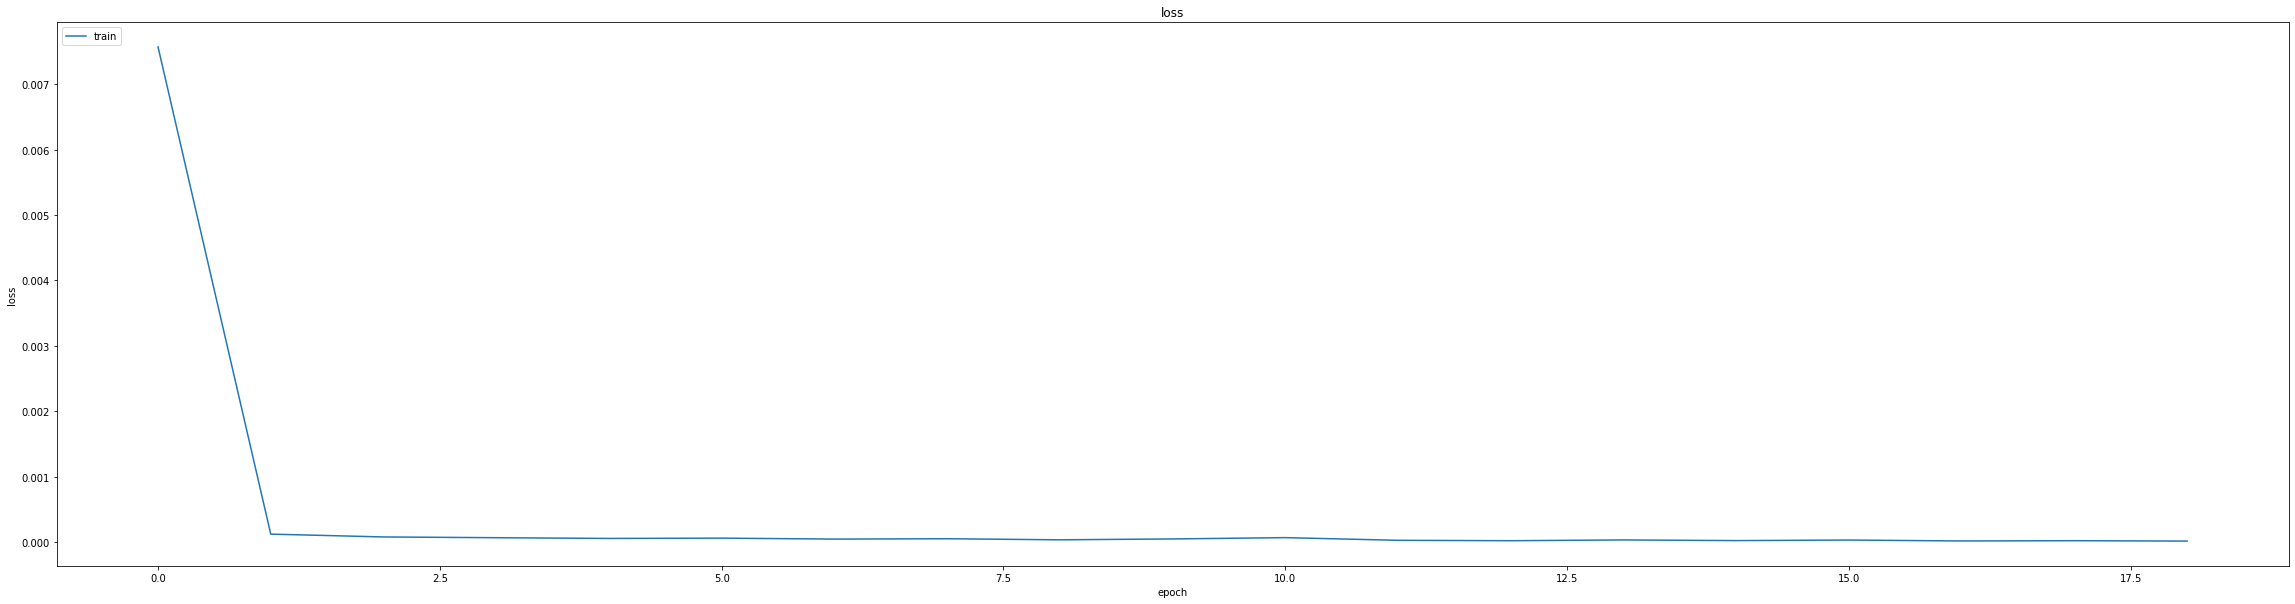

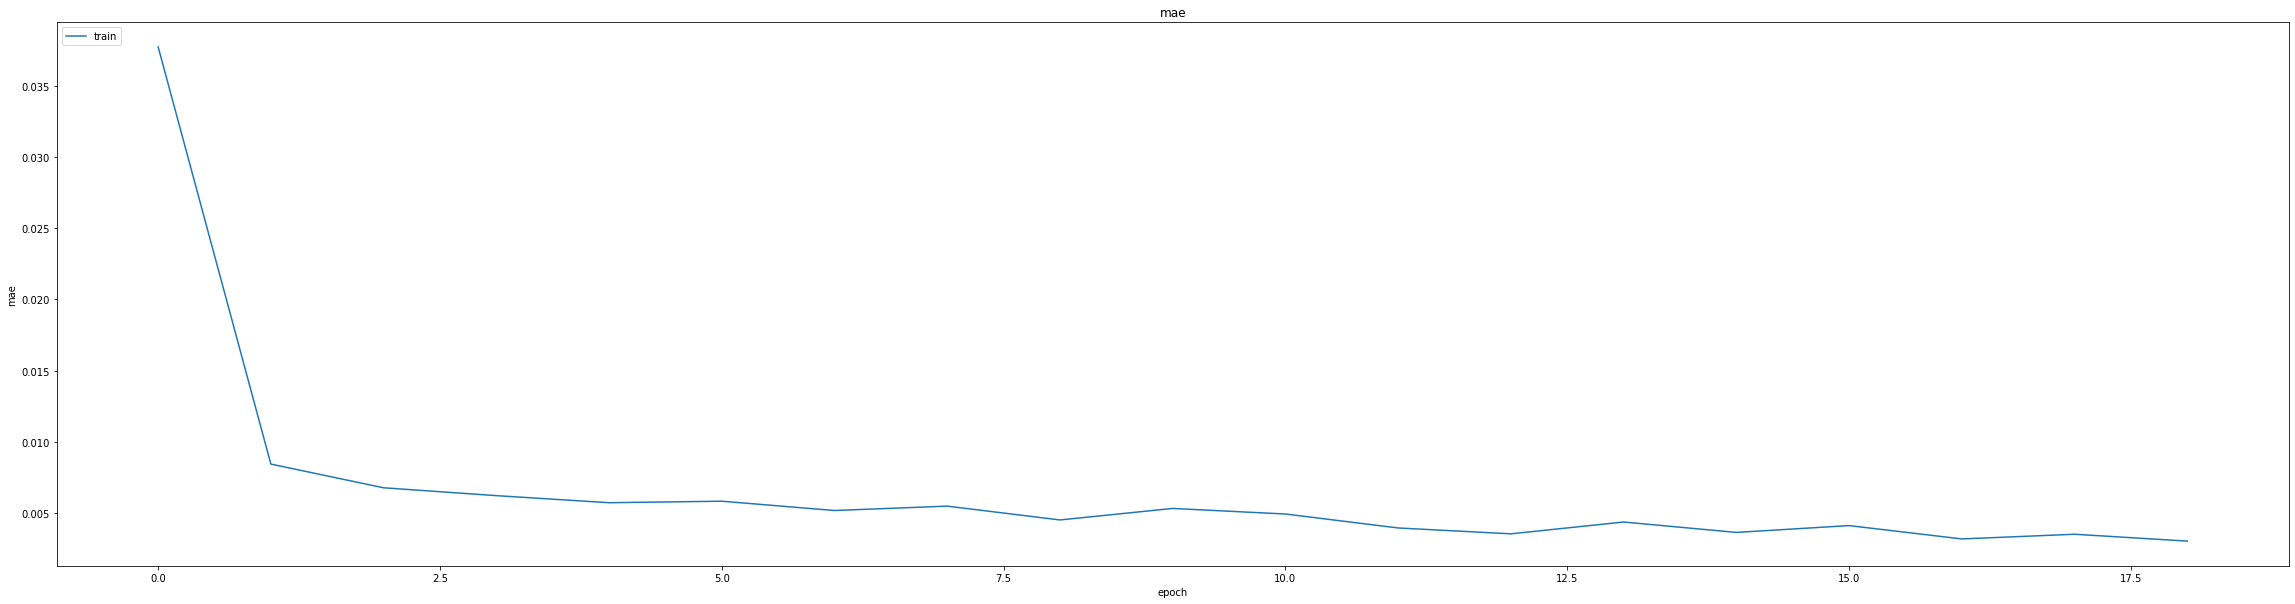

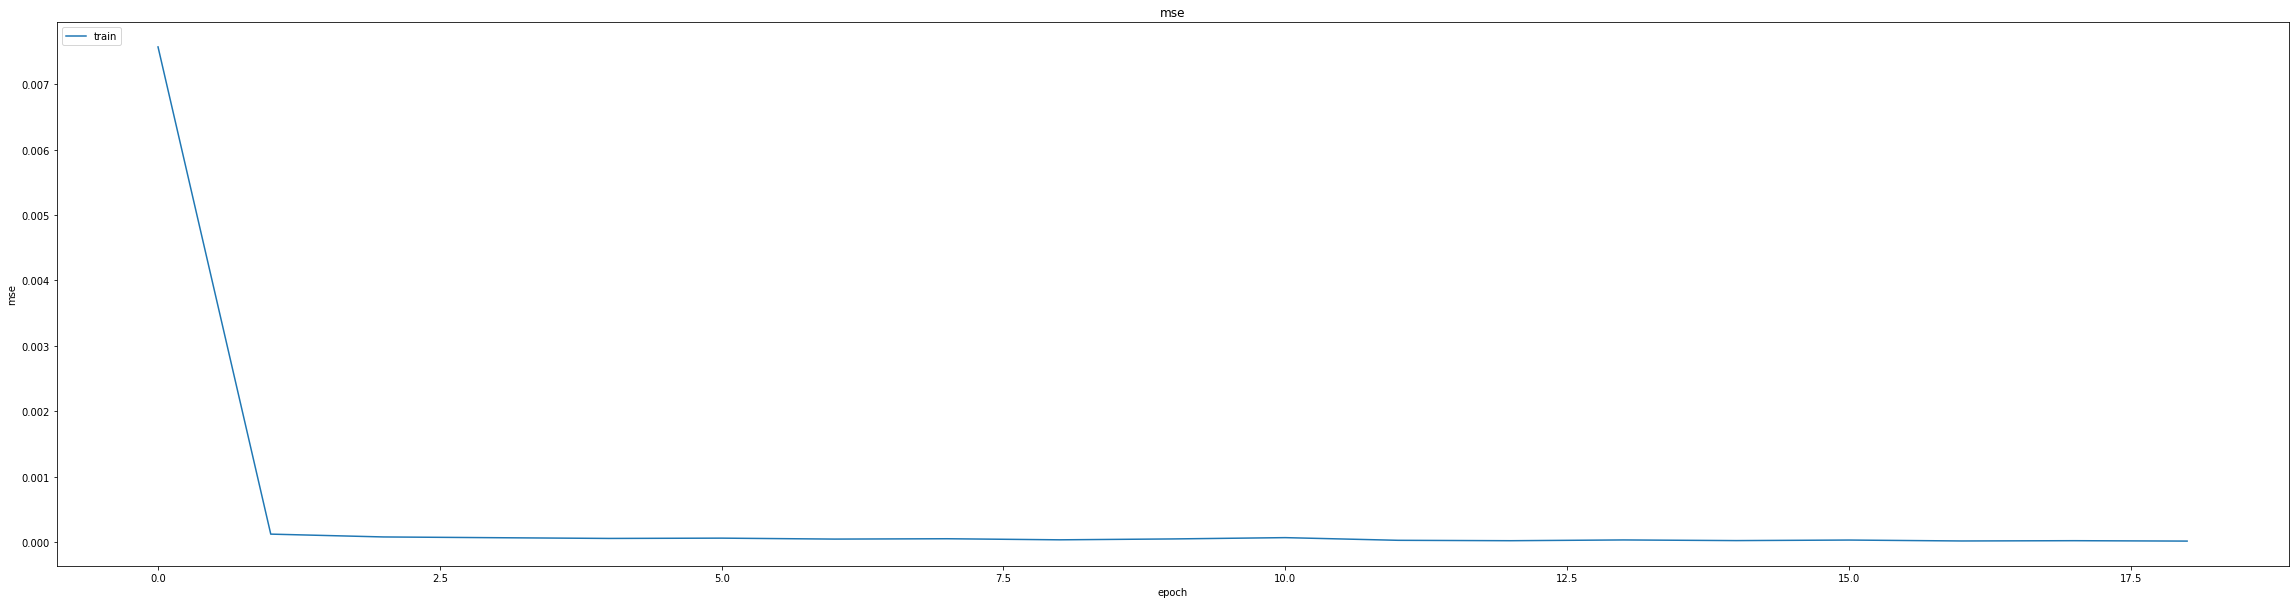

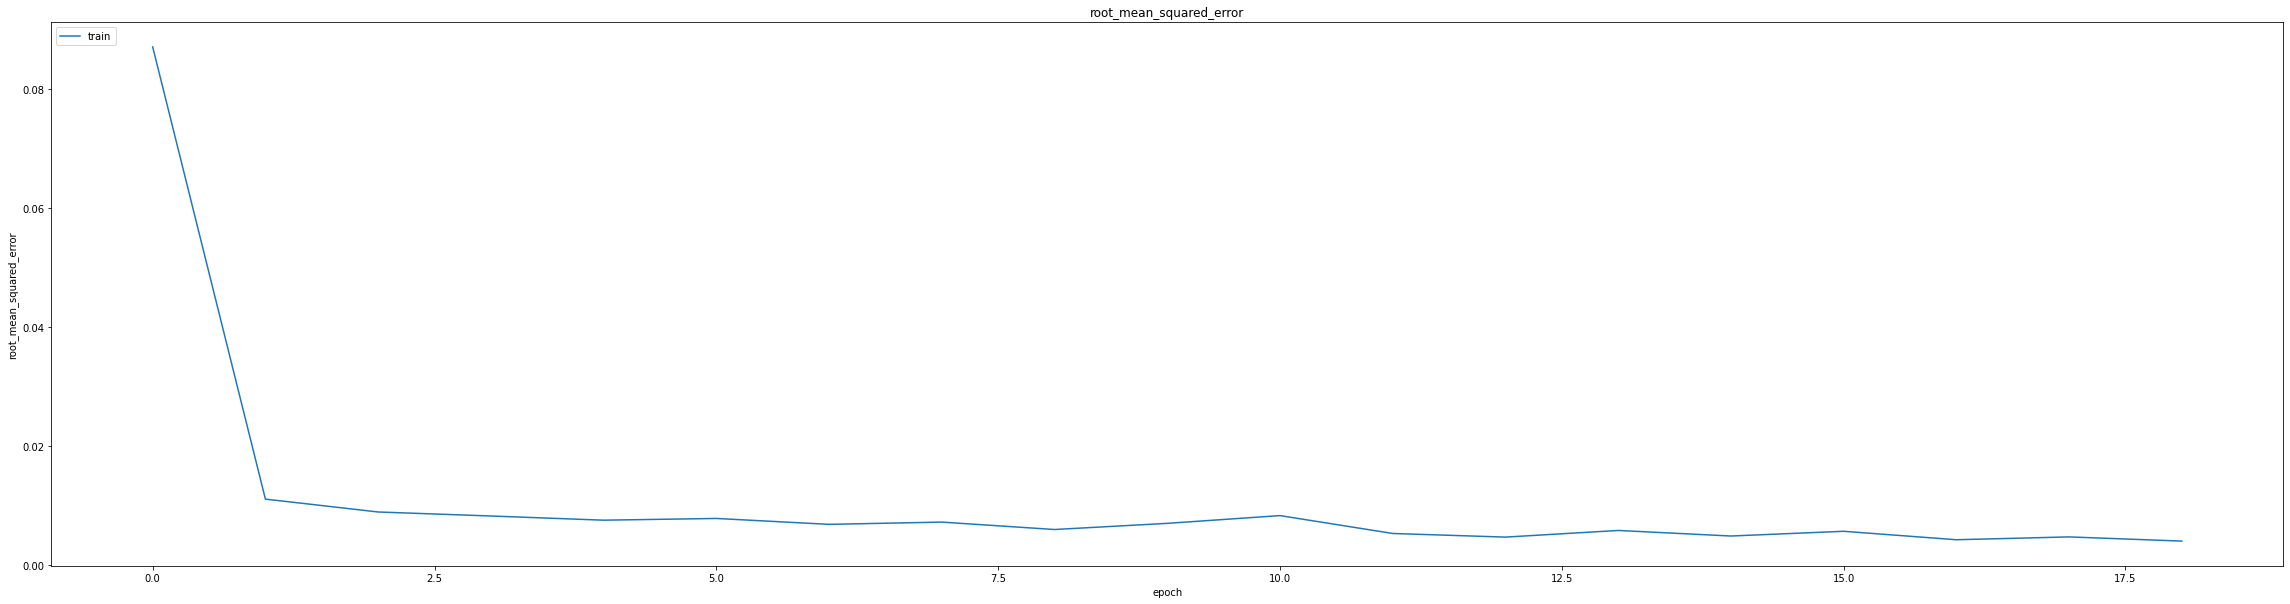

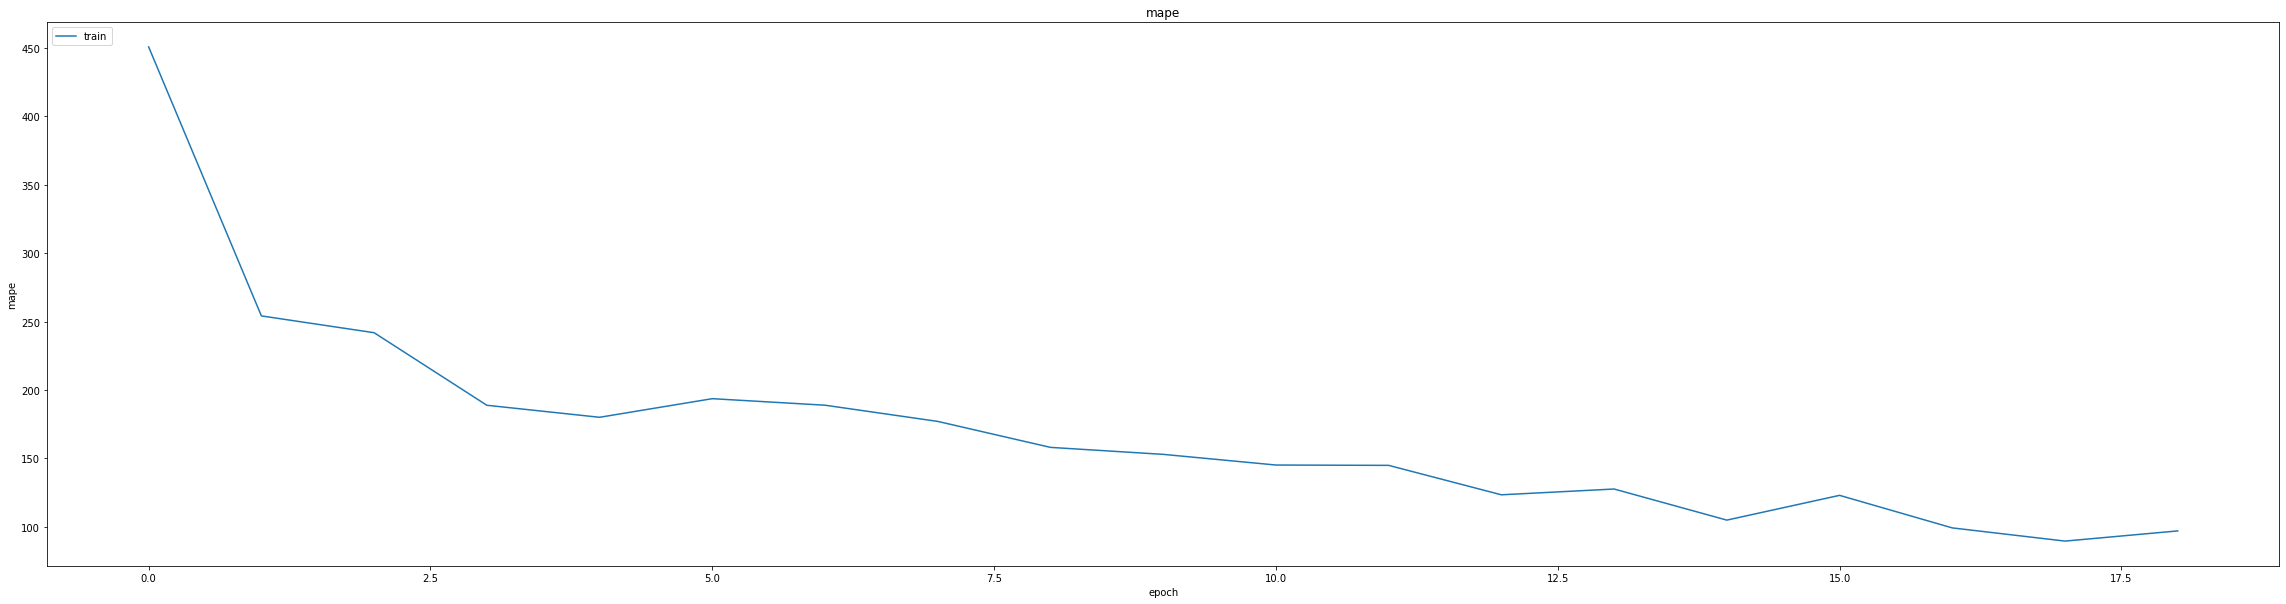

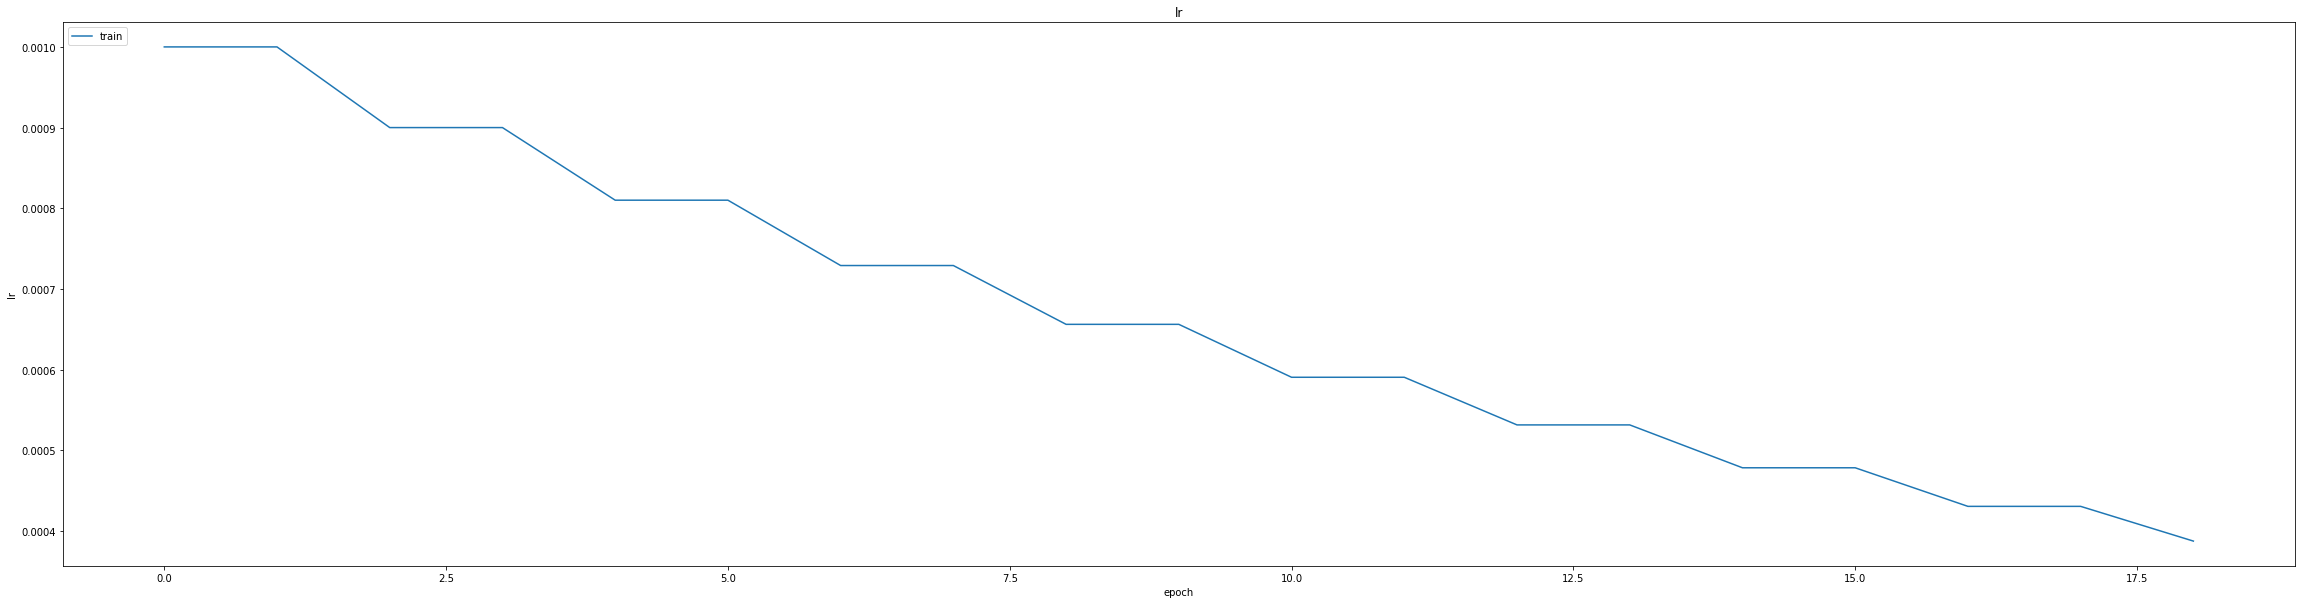

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008705439046025276
0.012985317967832088
687/687 [==============================] - 5s 5ms/step
0.9819178099156151


687/687 [==============================] - 4s 5ms/step


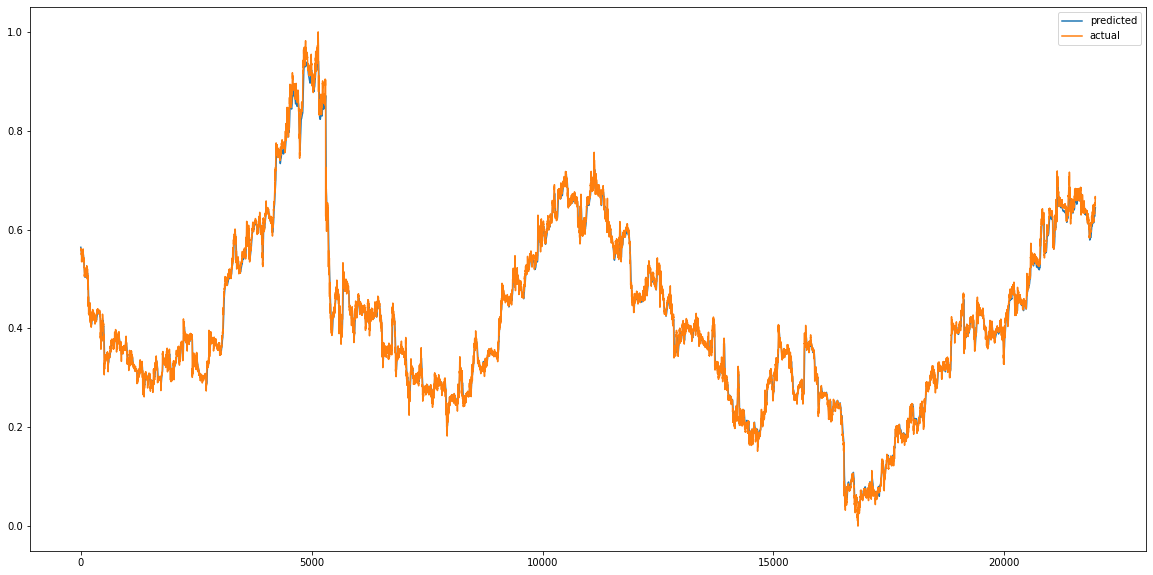

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


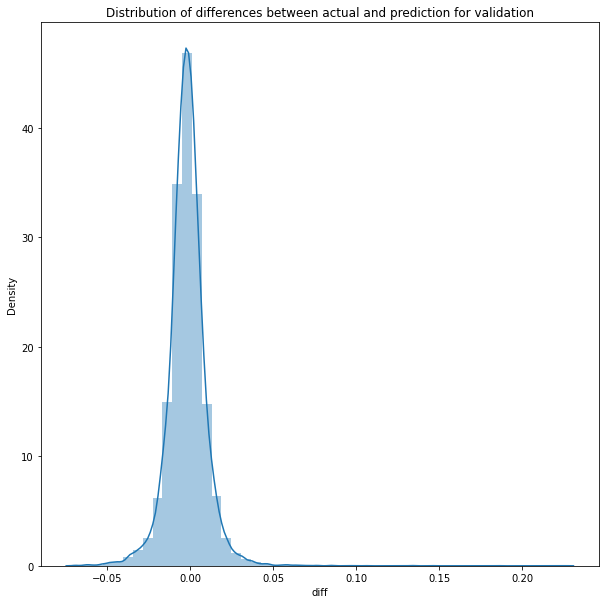

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

702/702 [==============================] - 4s 6ms/step


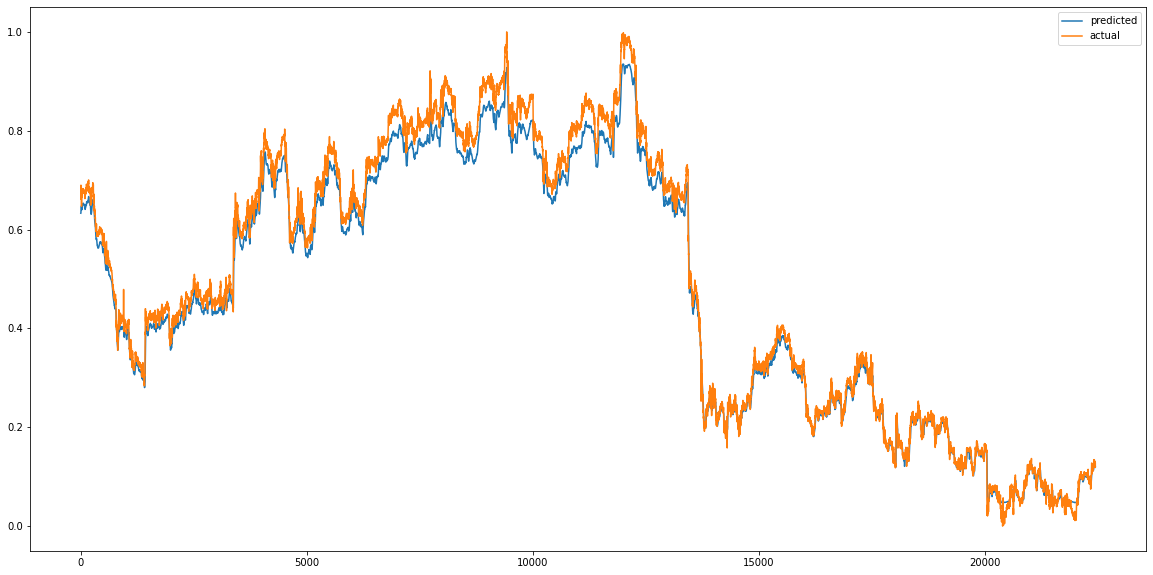

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


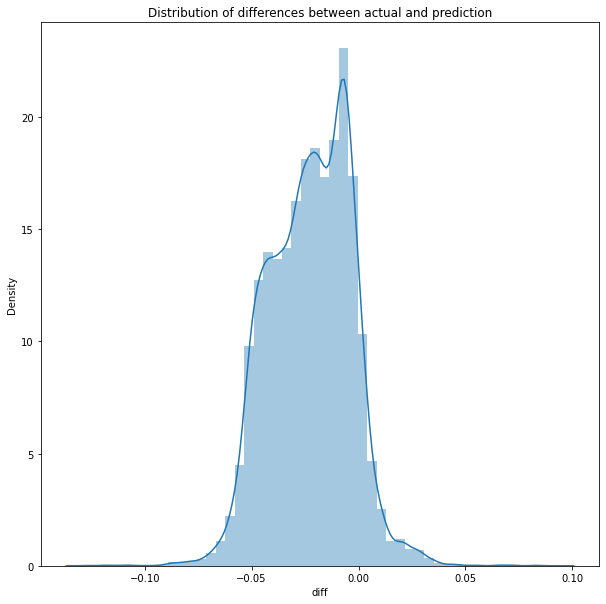

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0008640272503566871
MAE :  0.024101431525509646
RMSE  : 0.029394340447723728
702/702 [==============================] - 4s 5ms/step
R2_Score  : 0.9889244492534294


count    22452.000000
mean        -0.022463
std          0.018960
min         -0.128986
25%         -0.036779
50%         -0.021330
75%         -0.007948
max          0.092902
Name: diff, dtype: float64

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           295936    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 424.4354 - mae: 4.1112 - mse: 424.4354 - root_mean_squared_error: 20.6018 - mape: 5766.1274
Epoch 1: val_mse improved from inf to 0.03650, saving model to weights.best.hdf5
463/463 [==============================] - 296s 627ms/step - loss: 424.4354 - mae: 4.1112 - mse: 424.4354 - root_mean_squared_error: 20.6018 - mape: 5766.1274 - val_loss: 0.0365 - val_mae: 0.1590 - val_mse: 0.0365 - val_root_mean_squared_error: 0.1911 - val_mape: 22193.1270
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.0421 - mae: 0.1697 - mse: 0.0421 - root_mean_squared_error: 0.2052 - mape: 2310.0344
Epoch 2: val_mse improved from 0.03650 to 0.03280, saving model to weights.best.hdf5
463/463 [==============================] - 292s 630ms/step - loss: 0.0421 - mae: 0.1697 - mse: 0.0421 - root_mean_squared_error: 0.2052 - mape: 2310.0344 - val_loss: 0.0328 - val_mae: 0.1394 - val_mse: 0.0328 - val_root_mean_squared_error: 

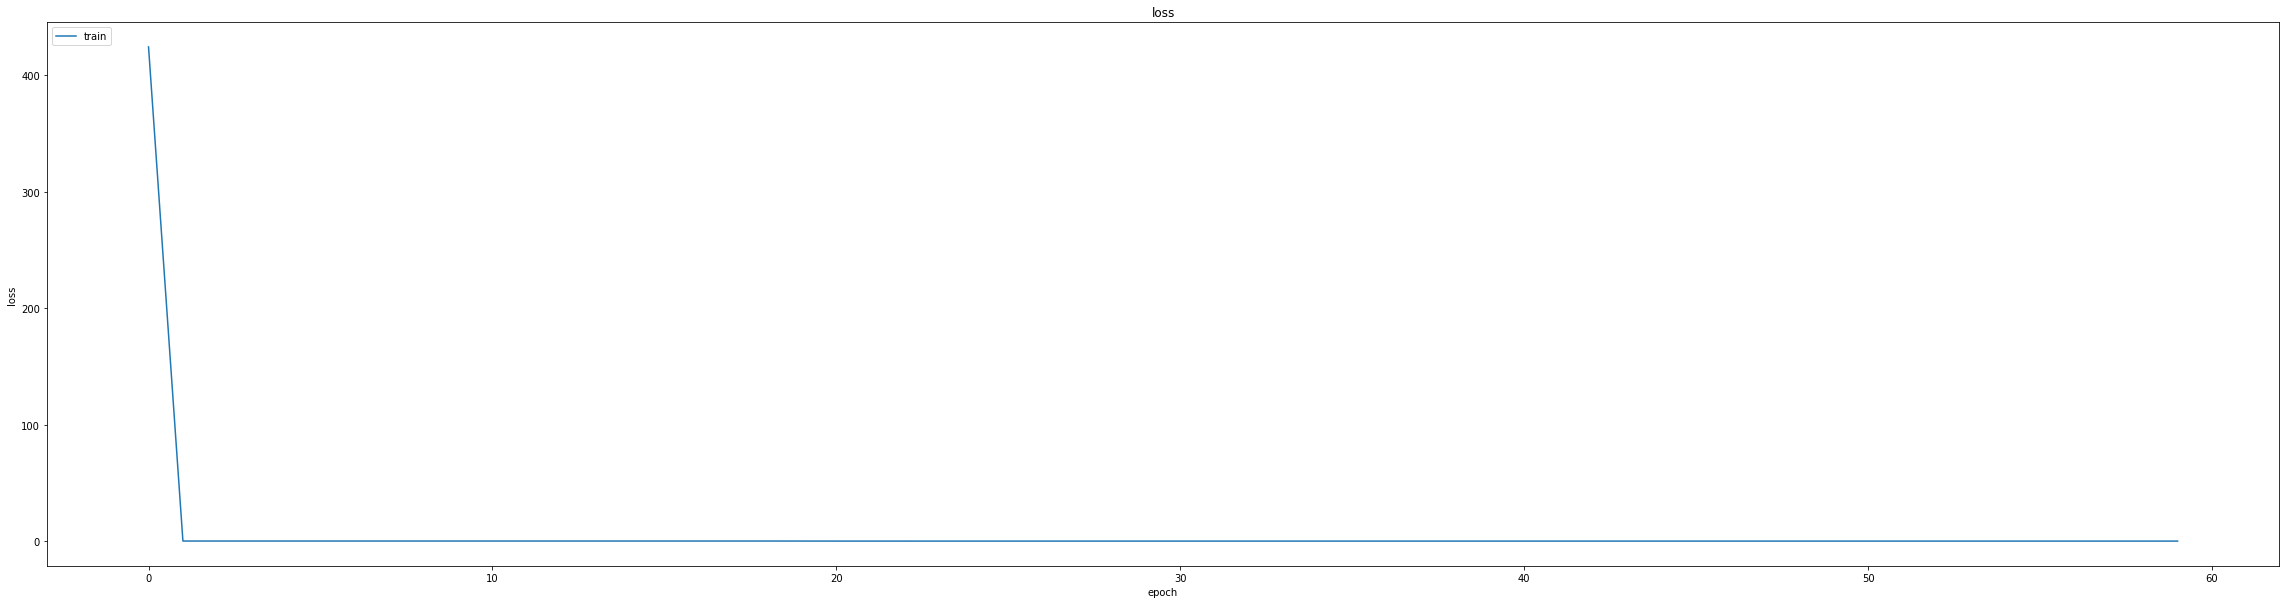

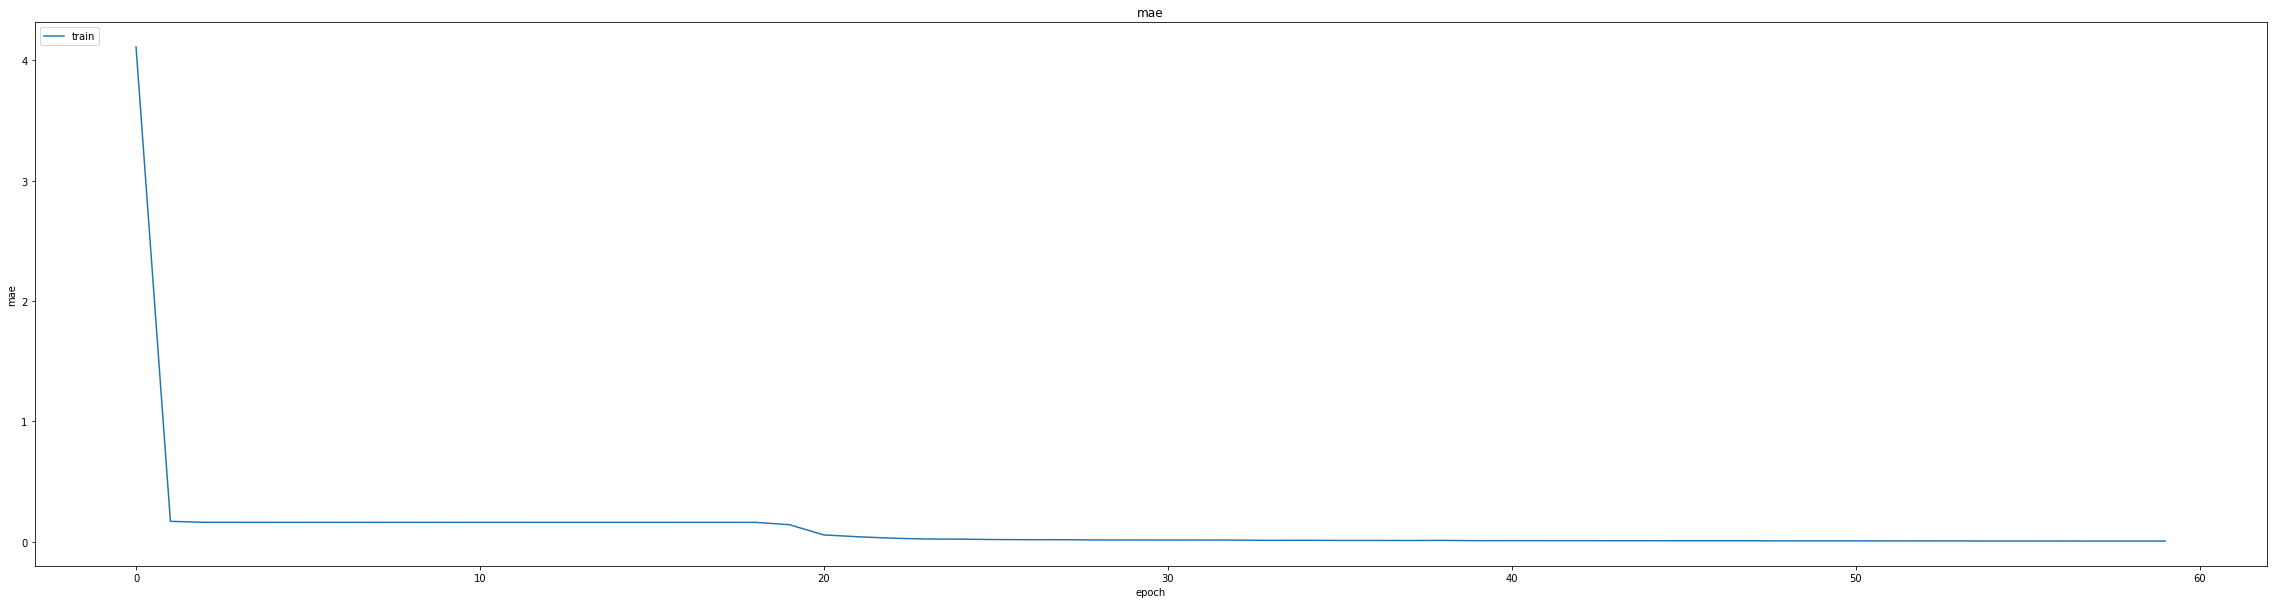

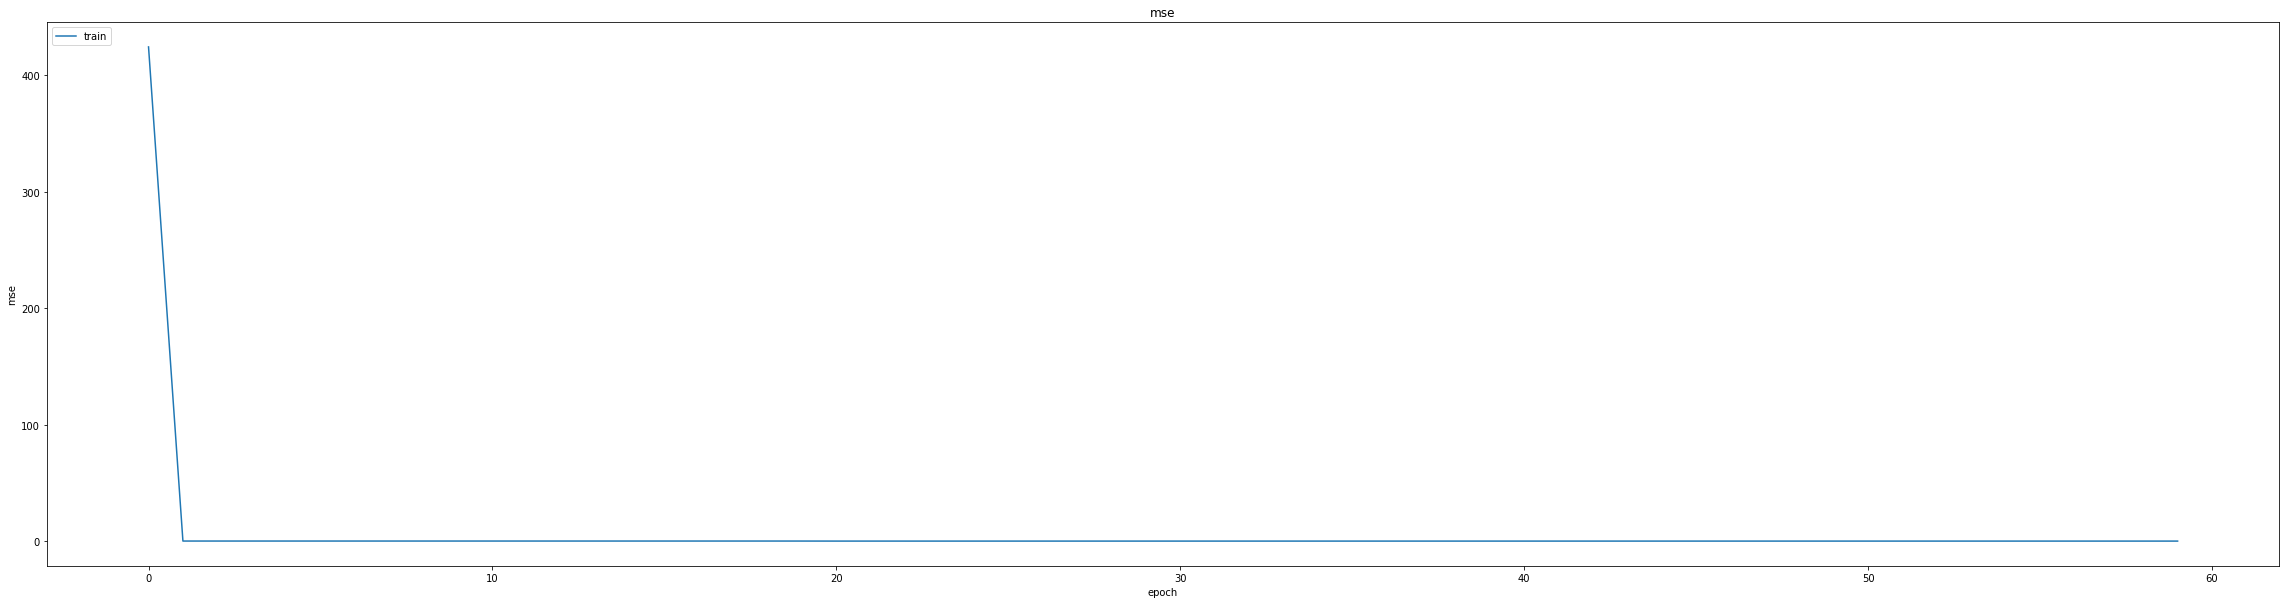

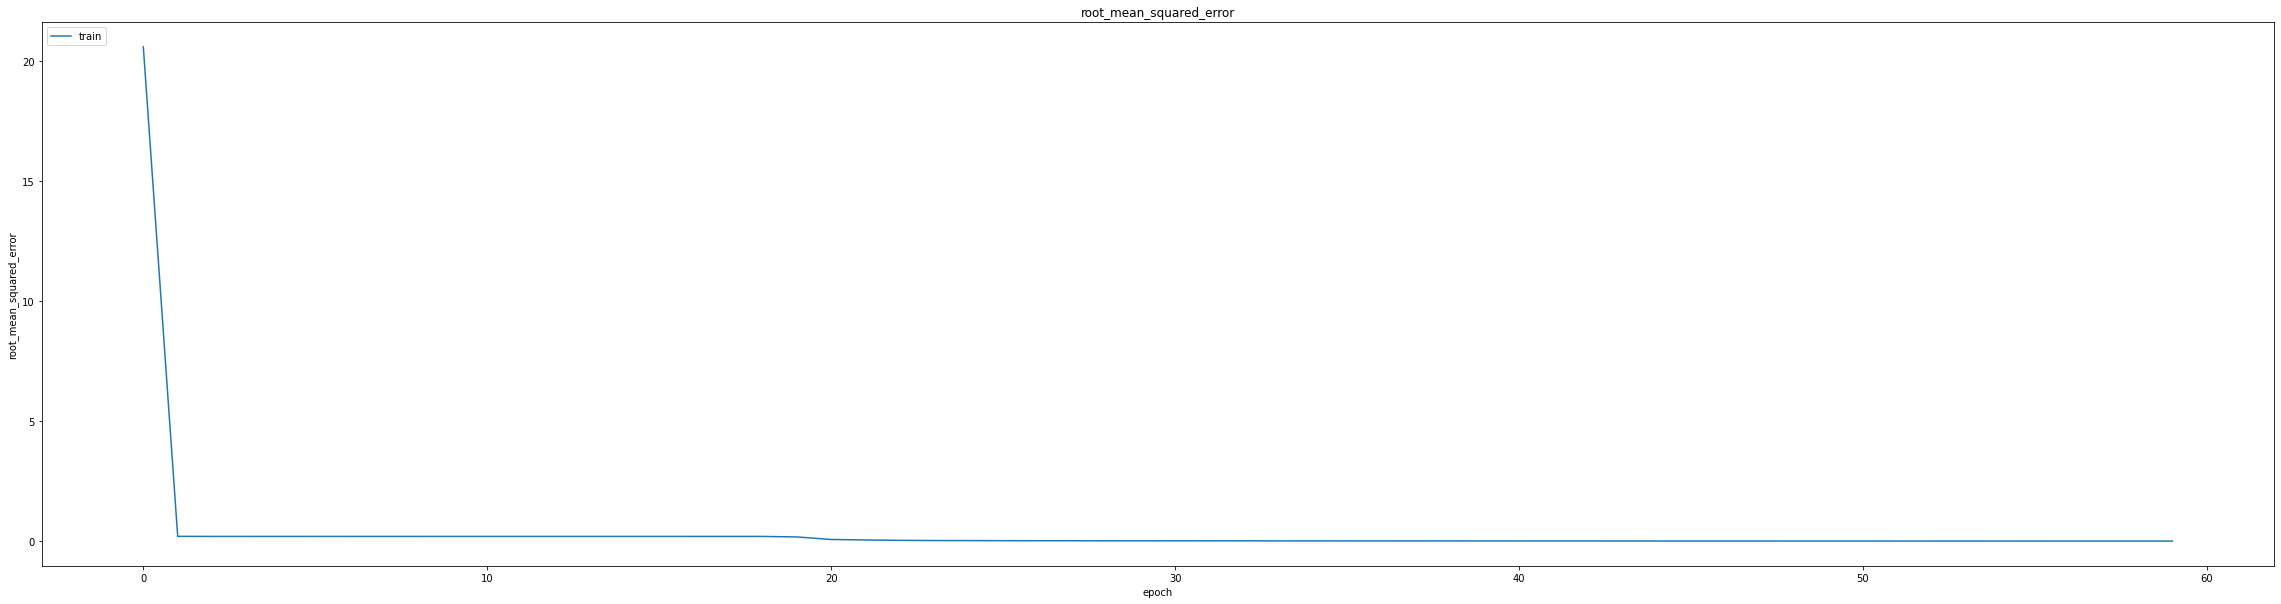

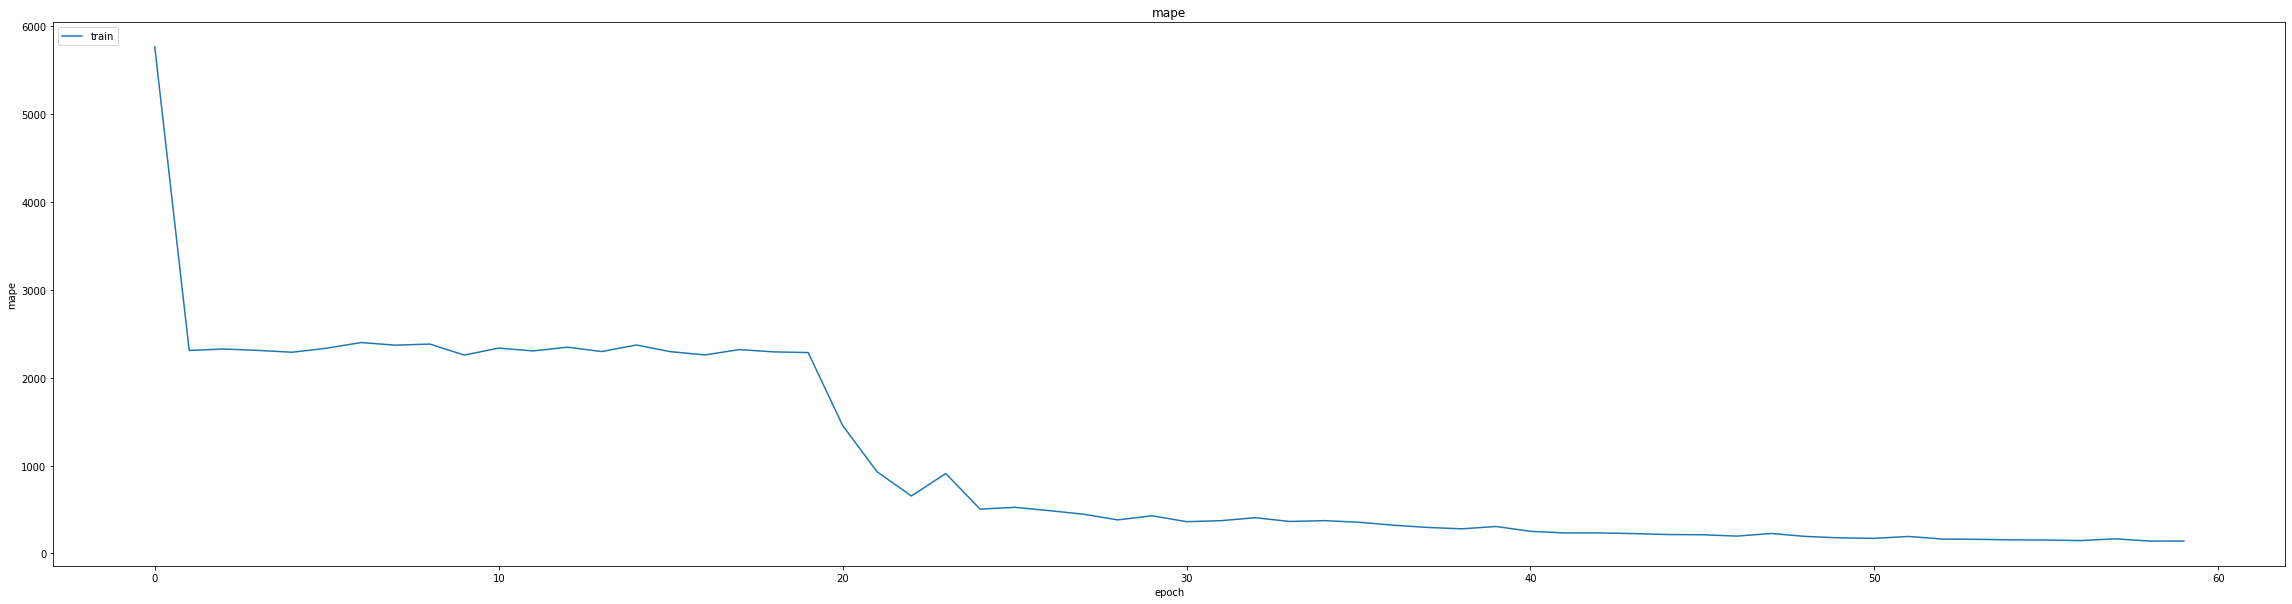

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.012243816629052162
0.012243816629052162
0.016982898116111755
687/687 [==============================] - 31s 41ms/step
0.9713401807373463


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:
early_stopping = EarlyStopping(monitor='val_mse', patience=12)

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 7.1051e-04 - mae: 0.0112 - mse: 7.1051e-04 - root_mean_squared_error: 0.0267 - mape: 267.3306
Epoch 1: val_mse did not improve from 0.00029
463/463 [==============================] - 331s 702ms/step - loss: 7.1051e-04 - mae: 0.0112 - mse: 7.1051e-04 - root_mean_squared_error: 0.0267 - mape: 267.3306 - val_loss: 4.4665e-04 - val_mae: 0.0171 - val_mse: 4.4665e-04 - val_root_mean_squared_error: 0.0211 - val_mape: 1846.8448 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 5.4235e-05 - mae: 0.0056 - mse: 5.4235e-05 - root_mean_squared_error: 0.0074 - mape: 191.3803
Epoch 2: val_mse did not improve from 0.00029
463/463 [==============================] - 321s 693ms/step - loss: 5.4235e-05 - mae: 0.0056 - mse: 5.4235e-05 - root_mean_squared_error: 0.0074 - mape: 191.3803 - val_loss: 3.1488e-04 - val_mae: 0.0136 - val_mse: 3.1488e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 1914.3508

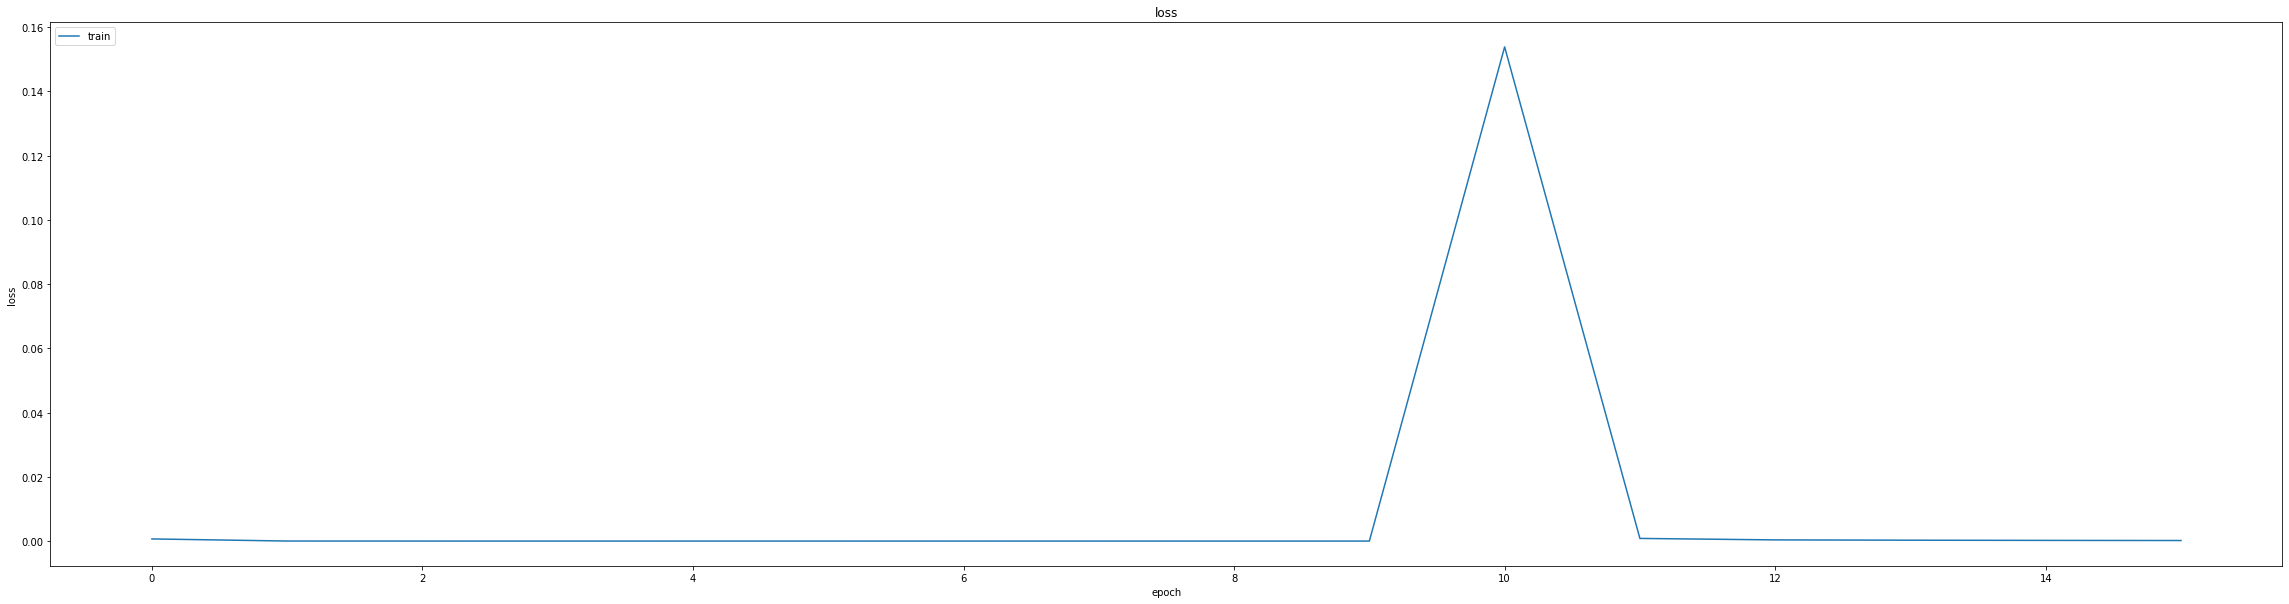

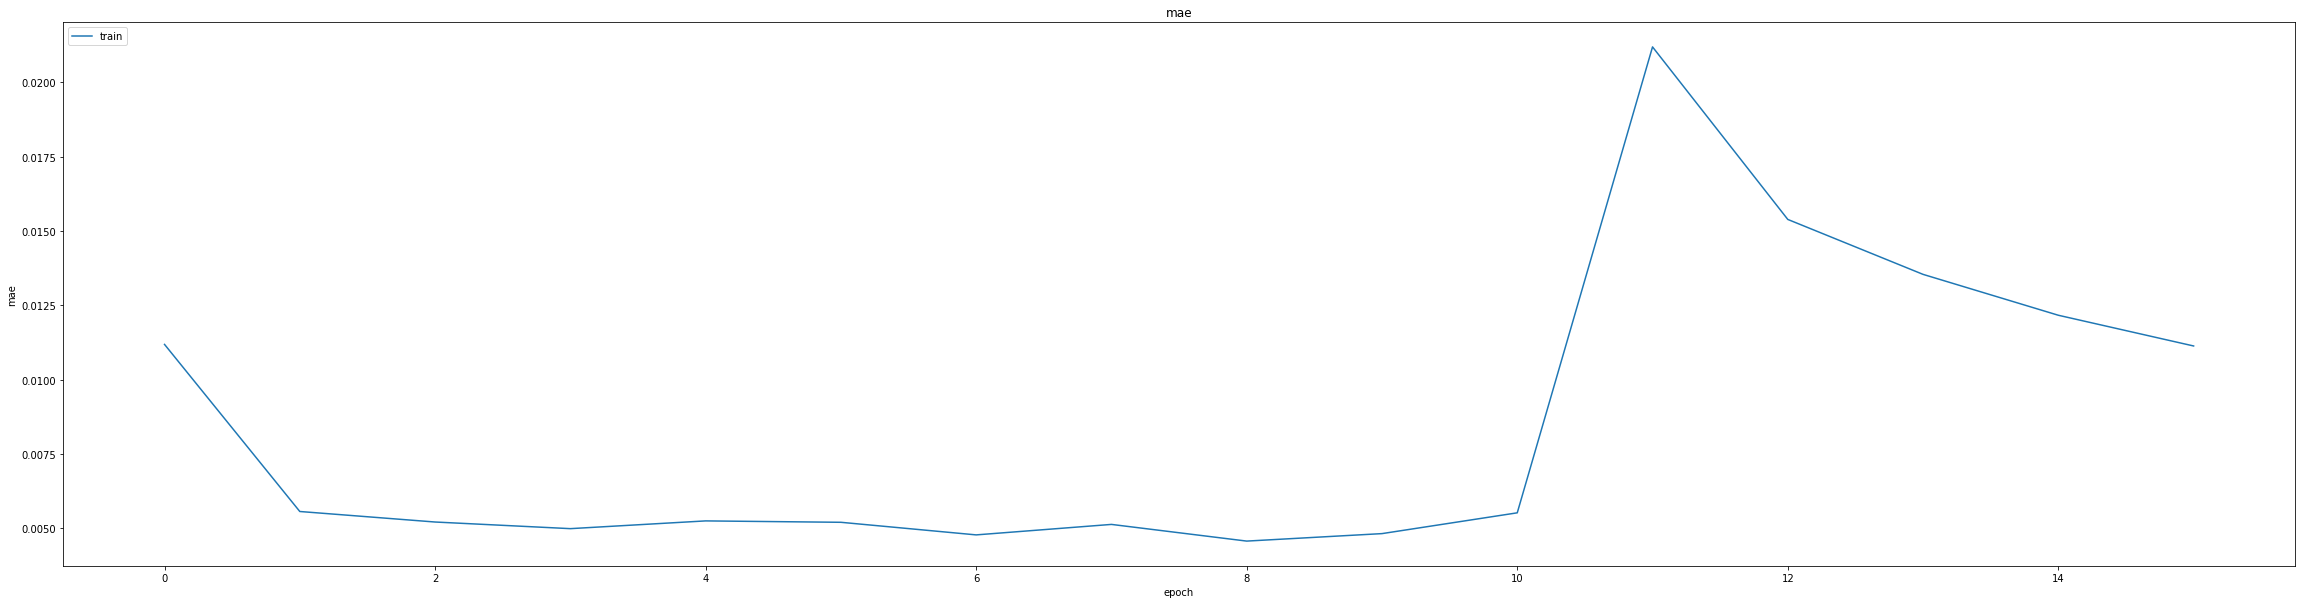

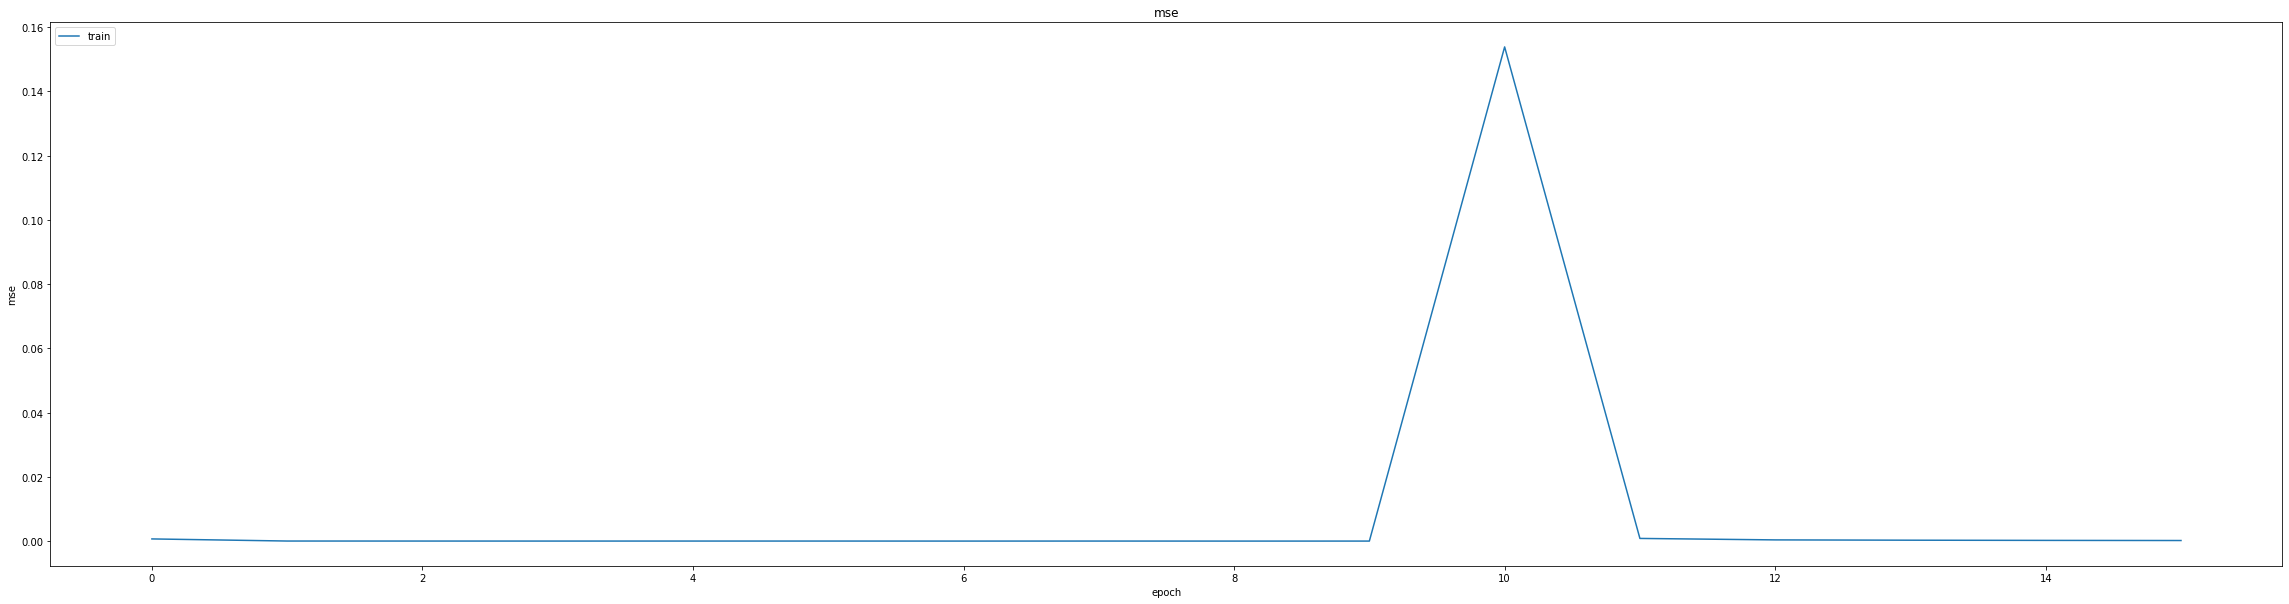

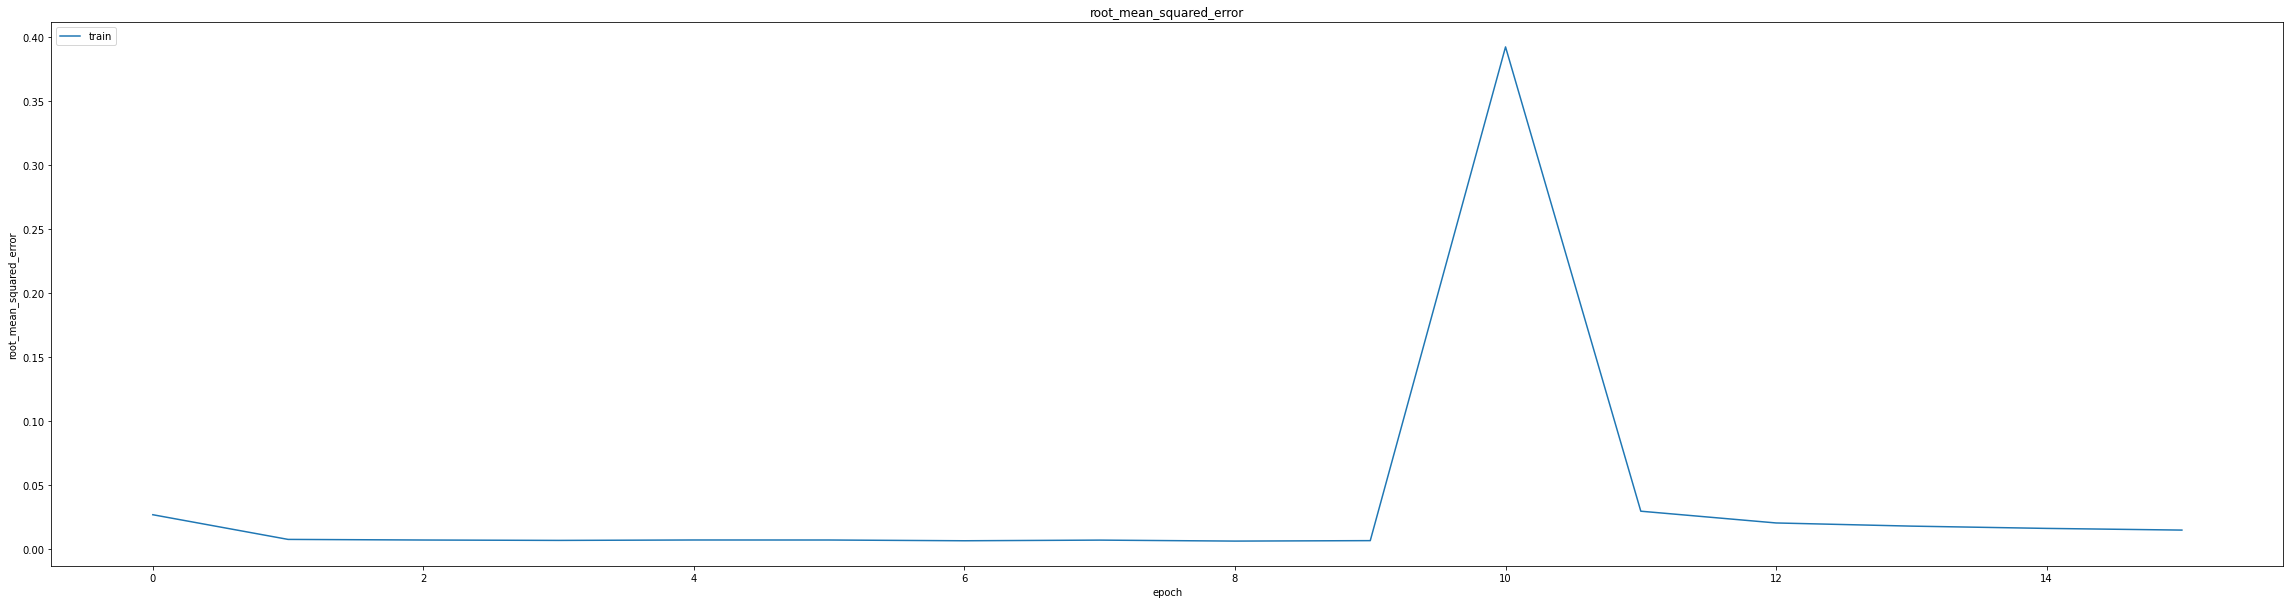

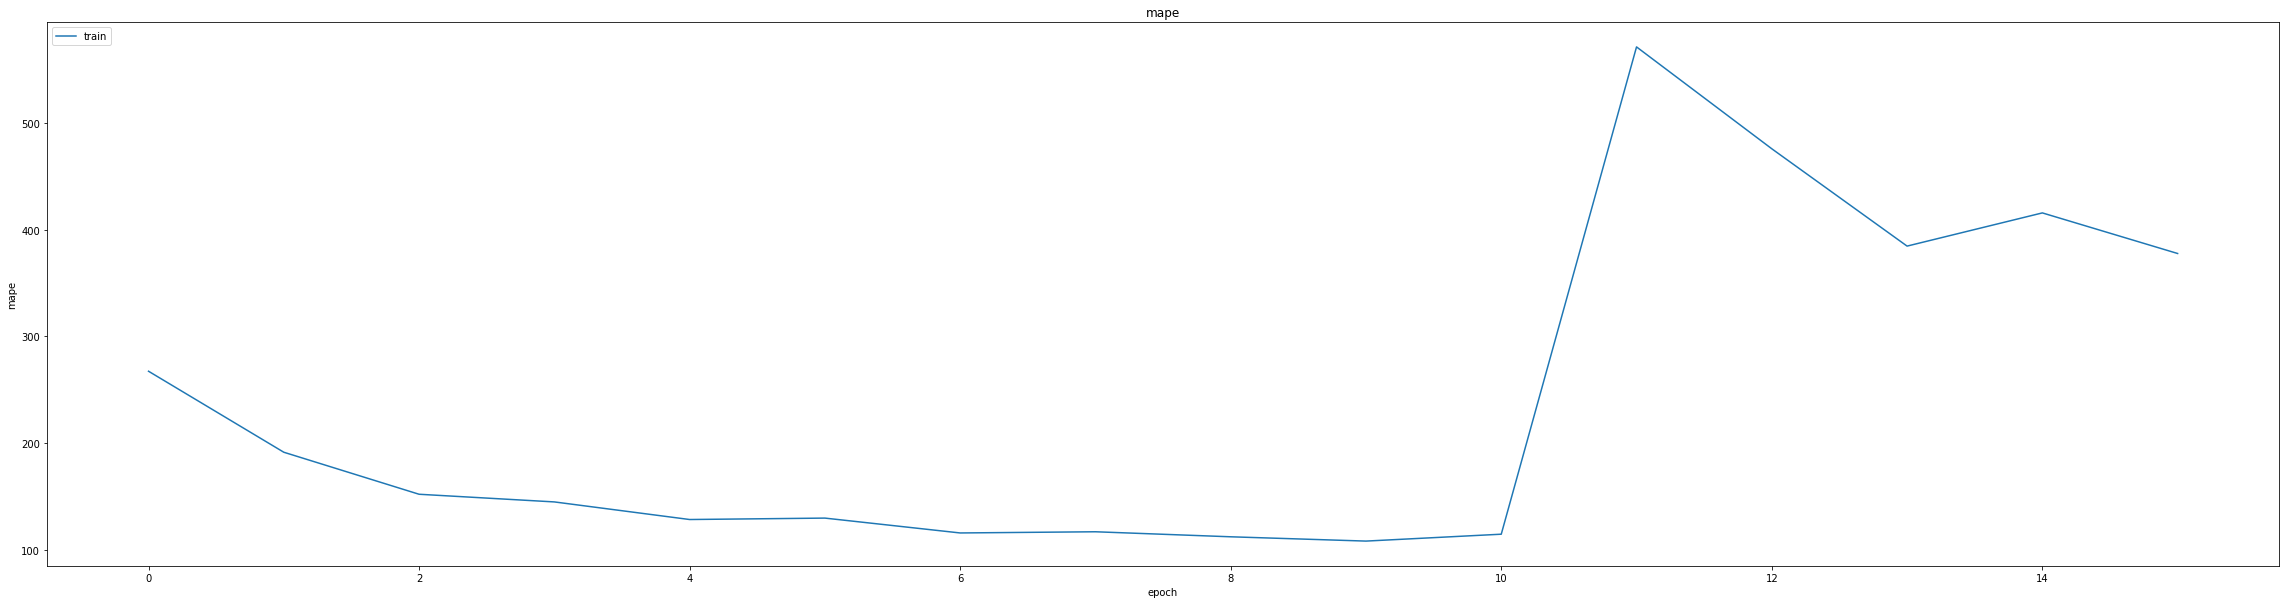

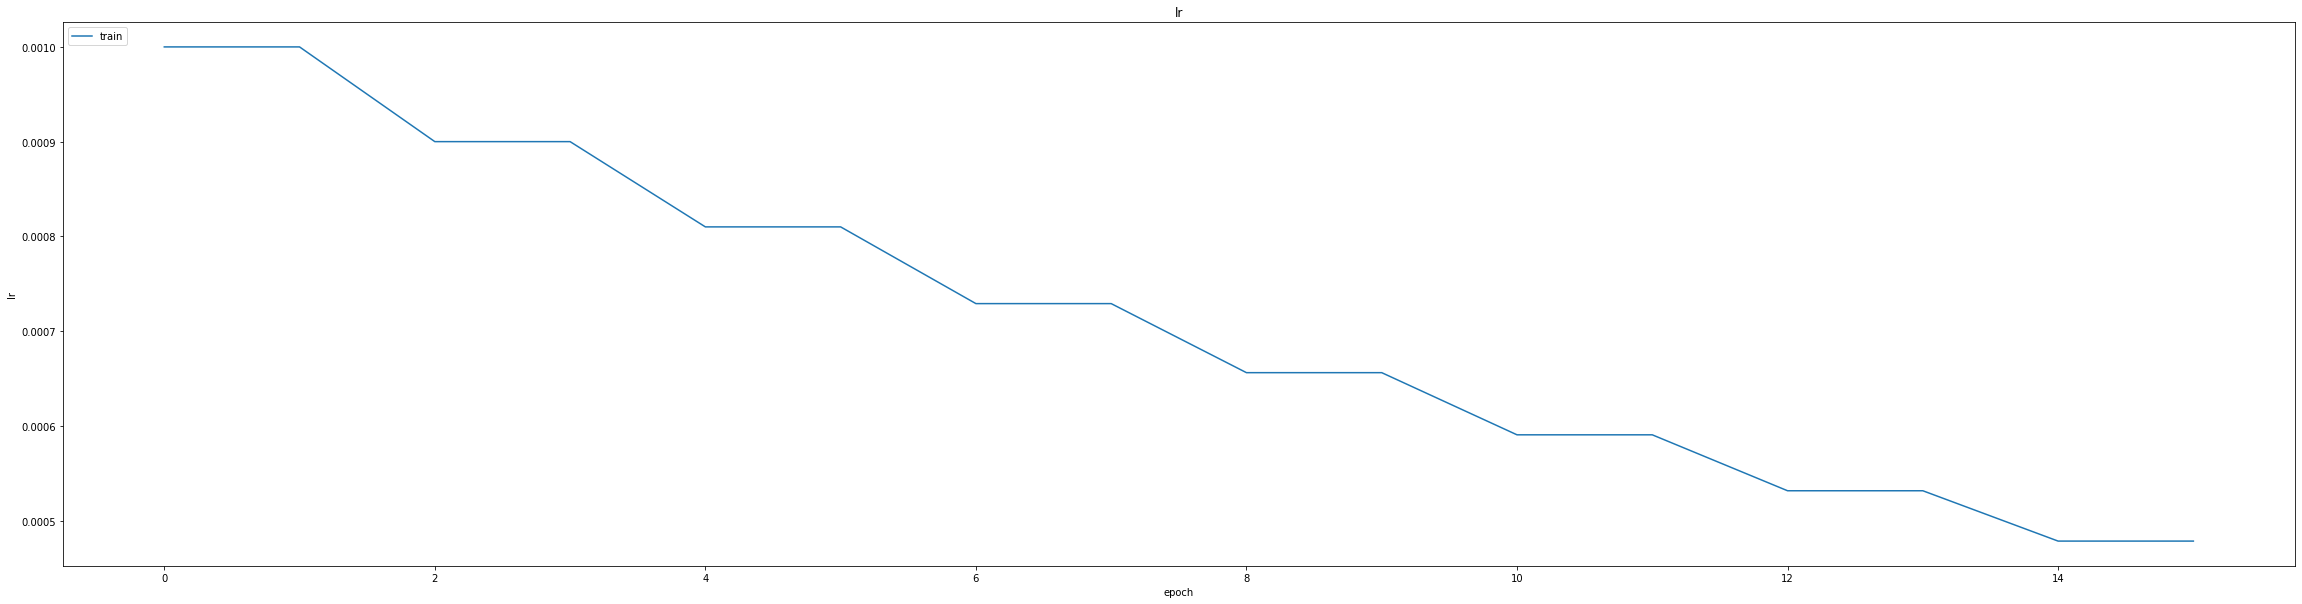

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.012154512107372284
0.012154512107372284
0.0160689614713192
687/687 [==============================] - 28s 39ms/step
0.9877849463333552


In [ ]:
model.load_weights("weights.best.hdf5")

687/687 [==============================] - 26s 37ms/step


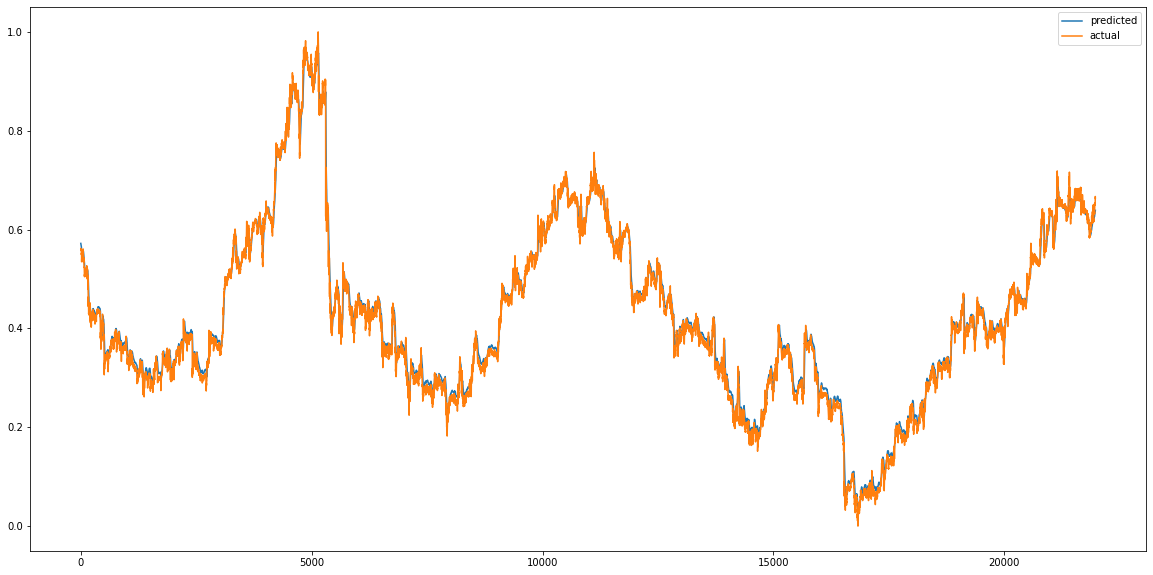

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


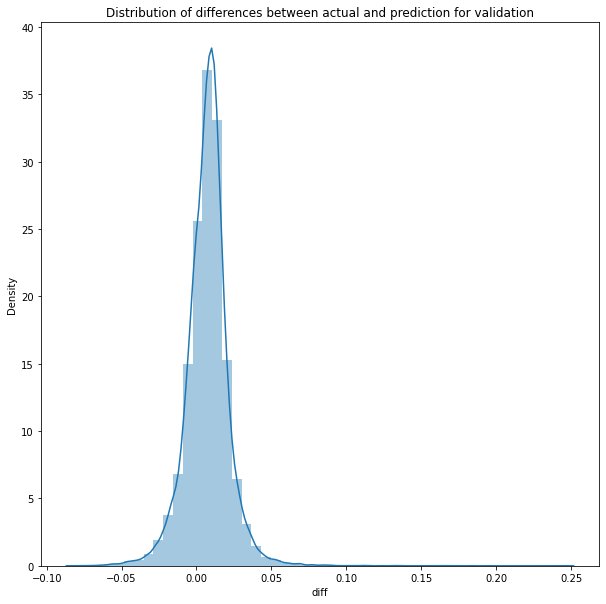

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

702/702 [==============================] - 30s 42ms/step


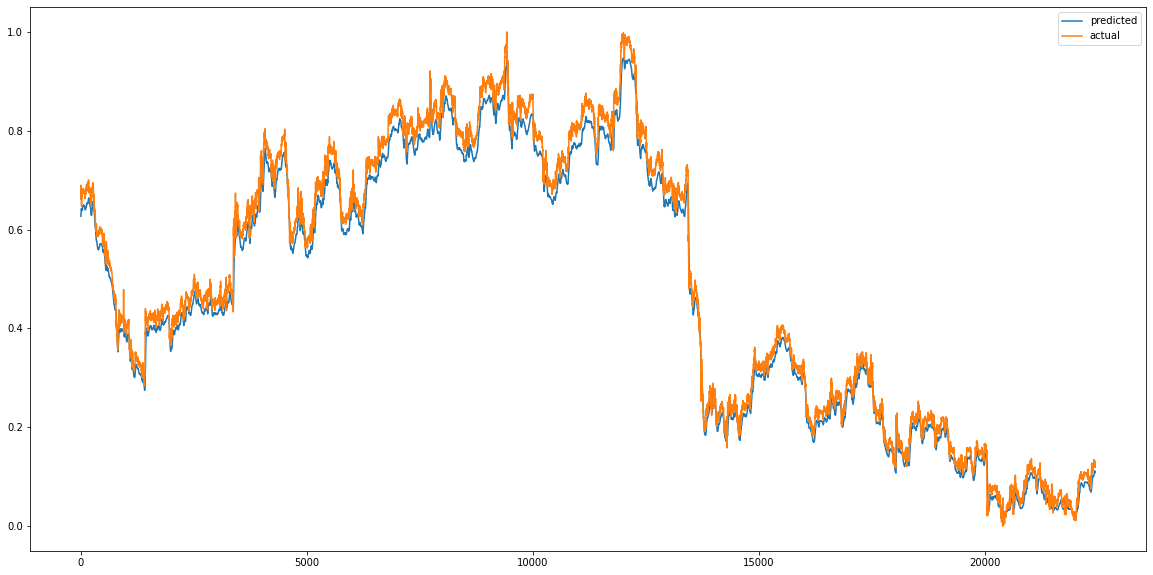

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


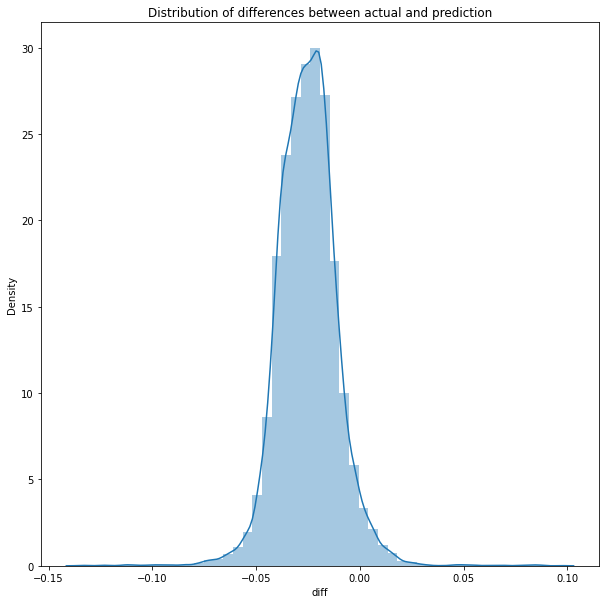

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.000841271161642416
MAE :  0.02593222067241902
RMSE :  0.02900467482393857
702/702 [==============================] - 26s 38ms/step
R2_Score  : 0.9877849463333552


count    22452.000000
mean        -0.025183
std          0.014391
min         -0.135620
25%         -0.034316
50%         -0.025224
75%         -0.016747
max          0.097184
Name: diff, dtype: float64